# 1° Desafio de dados
###Ciências de dados em Recursos Humanos Data Viking

Esta análise tem como objetivo fornecer insights para uma empresa sobre a rotatividade de funcionários. A alta rotatividade acarreta diversas consequências negativas para a empresa, impactando a produtividade, as finanças e a qualidade dos produtos, entre outros aspectos. Com esta análise de dados, poderemos identificar informações cruciais para minimizar esse problema.

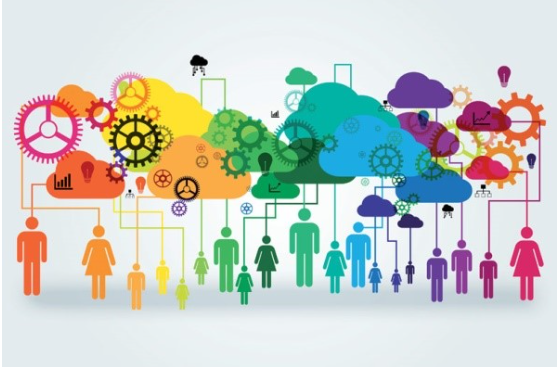



##Questões do problema

Faremos algumas perguntas e buscaremos responder com base nas evidências fornecidas pelos dados.

Questões pontuadas:

1.   Existe algum cargo com maior rotatividade?
2.   Os menores salários estão satisfeitos com a empresa?
3.   Há algum cargo com baixa satisfação?
4.   Horas extras podem estar causando a rotatividade?
5.   Qual desempenho geral dos empregados que foram desligados?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install xlrd

In [ ]:
data = 'Base_dados - Rotatividade RH.xlsx'
header = 0
data = pd.read_excel(data,  header = header)
data.head()

Data_Contratacao Data_Desligamento  Meses_de_Servico  Idade  \
0       2024-02-14               NaT                 3     24   
1       2023-11-16        2024-05-14                 6     43   
2       2023-11-16               NaT                 6     45   
3       2023-05-20               NaT                12     31   
4       2022-07-24               NaT                22     37   

   Pontuacao_Desempenho  Satisfacao_Trabalho Nivel_Cargo  Salario  \
0              2.066788             2.043644       Pleno  4994.41   
1              3.256257             1.711719      Sênior  8798.34   
2              4.827732             3.480214      Sênior  8891.02   
3              1.453944             1.617558       Pleno  7606.22   
4              2.088917             2.763390      Sênior  9236.03   

   Horas_Extras  Desligamento  
0     15.465241             0  
1     19.036627             1  
2     13.326408             0  
3     14.209663             0  
4     11.059687             0

In [ ]:
data.isnull().sum()

Data_Contratacao          0
Data_Desligamento       506
Meses_de_Servico          0
Idade                     0
Pontuacao_Desempenho      0
Satisfacao_Trabalho       0
Nivel_Cargo               0
Salario                   0
Horas_Extras              0
Desligamento              0
dtype: int64

In [ ]:
data.shape

(650, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB


In [ ]:
data.nunique()

Data_Contratacao         33
Data_Desligamento         1
Meses_de_Servico         33
Idade                    32
Pontuacao_Desempenho    650
Satisfacao_Trabalho     650
Nivel_Cargo               3
Salario                 650
Horas_Extras            540
Desligamento              2
dtype: int64

In [ ]:
data.describe()

Data_Contratacao    Data_Desligamento  Meses_de_Servico  \
count                            650                  144        650.000000   
mean   2022-10-31 06:38:46.153846272  2024-05-14 00:00:00         18.690769   
min              2021-06-29 00:00:00  2024-05-14 00:00:00          3.000000   
25%              2022-02-24 00:00:00  2024-05-14 00:00:00         10.000000   
50%              2022-10-22 00:00:00  2024-05-14 00:00:00         19.000000   
75%              2023-07-19 00:00:00  2024-05-14 00:00:00         27.000000   
max              2024-02-14 00:00:00  2024-05-14 00:00:00         35.000000   
std                              NaN                  NaN          9.652262   

            Idade  Pontuacao_Desempenho  Satisfacao_Trabalho       Salario  \
count  650.000000            650.000000           650.000000    650.000000   
mean    28.349231              3.027463             2.940577   6131.587062   
min     18.000000              1.000242             1.002868   2004.500000   
25%     22.000000              1.988753             1.968571   4023.752500   
50%     27.000000              3.058911             2.923458   5562.950000   
75%     33.000000              4.022709             3.964356   7814.480000   
max     49.000000              4.992102             4.999415  11957.290000   
std      8.014983              1.174226             1.148514   2689.075566   

       Horas_Extras  Desligamento  
count    650.000000    650.000000  
mean      10.098864      0.221538  
min        0.003734      0.000000  
25%        4.978000      0.000000  
50%        9.413546      0.000000  
75%       14.749310      0.000000  
max       41.638350      1.000000  
std        6.242406      0.415602

Vamos criar algumas colunas para ajudar na análise

In [ ]:
data.head()

Data_Contratacao Data_Desligamento  Meses_de_Servico  Idade  \
0       2024-02-14               NaT                 3     24   
1       2023-11-16        2024-05-14                 6     43   
2       2023-11-16               NaT                 6     45   
3       2023-05-20               NaT                12     31   
4       2022-07-24               NaT                22     37   

   Pontuacao_Desempenho  Satisfacao_Trabalho Nivel_Cargo  Salario  \
0              2.066788             2.043644       Pleno  4994.41   
1              3.256257             1.711719      Sênior  8798.34   
2              4.827732             3.480214      Sênior  8891.02   
3              1.453944             1.617558       Pleno  7606.22   
4              2.088917             2.763390      Sênior  9236.03   

   Horas_Extras  Desligamento  
0     15.465241             0  
1     19.036627             1  
2     13.326408             0  
3     14.209663             0  
4     11.059687             0

In [ ]:
status_dict = {0:"Ativo",
               1:'Desligado',}

In [ ]:
data['Status'] = data['Desligamento'].map(status_dict)
data.head()

Data_Contratacao Data_Desligamento  Meses_de_Servico  Idade  \
0       2024-02-14               NaT                 3     24   
1       2023-11-16        2024-05-14                 6     43   
2       2023-11-16               NaT                 6     45   
3       2023-05-20               NaT                12     31   
4       2022-07-24               NaT                22     37   

   Pontuacao_Desempenho  Satisfacao_Trabalho Nivel_Cargo  Salario  \
0              2.066788             2.043644       Pleno  4994.41   
1              3.256257             1.711719      Sênior  8798.34   
2              4.827732             3.480214      Sênior  8891.02   
3              1.453944             1.617558       Pleno  7606.22   
4              2.088917             2.763390      Sênior  9236.03   

   Horas_Extras  Desligamento     Status  
0     15.465241             0      Ativo  
1     19.036627             1  Desligado  
2     13.326408             0      Ativo  
3     14.209663             0      Ativo  
4     11.059687             0      Ativo

In [ ]:
#funções
def g_idade(idade):
    if idade < 20:
        return 'Até 20 anos'
    elif idade < 30:
        return 'Entre 20 e 29 anos'
    elif idade < 40:
        return 'Entre 30 e 39 anos'
    else:
        return 'Entre 40 e 49 anos'


def g_salario(salario):
  if salario <= 4000:
    return "Até 4.000"
  elif salario <= 6000:
    return "Até 6.000"
  elif salario <= 8000:
    return "Até 8.000"
  elif salario <= 10000:
    return "Até 10.000"
  else:
    return "Mais que 10.000"

In [ ]:
data["Faixa_Salario"] = data['Salario'].apply(g_salario)
data["Faixa_Idades"] = data['Idade'].apply(g_idade)
data.head()

Data_Contratacao Data_Desligamento  Meses_de_Servico  Idade  \
0       2024-02-14               NaT                 3     24   
1       2023-11-16        2024-05-14                 6     43   
2       2023-11-16               NaT                 6     45   
3       2023-05-20               NaT                12     31   
4       2022-07-24               NaT                22     37   

   Pontuacao_Desempenho  Satisfacao_Trabalho Nivel_Cargo  Salario  \
0              2.066788             2.043644       Pleno  4994.41   
1              3.256257             1.711719      Sênior  8798.34   
2              4.827732             3.480214      Sênior  8891.02   
3              1.453944             1.617558       Pleno  7606.22   
4              2.088917             2.763390      Sênior  9236.03   

   Horas_Extras  Desligamento     Status Faixa_Salario        Faixa_Idades  
0     15.465241             0      Ativo     Até 6.000  Entre 20 e 29 anos  
1     19.036627             1  Desligado    Até 10.000  Entre 40 e 49 anos  
2     13.326408             0      Ativo    Até 10.000  Entre 40 e 49 anos  
3     14.209663             0      Ativo     Até 8.000  Entre 30 e 39 anos  
4     11.059687             0      Ativo    Até 10.000  Entre 30 e 39 anos

#Análise Univariada Geral

In [ ]:
lista = ['Meses_de_Servico','Idade'	,'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Salario','Horas_Extras']

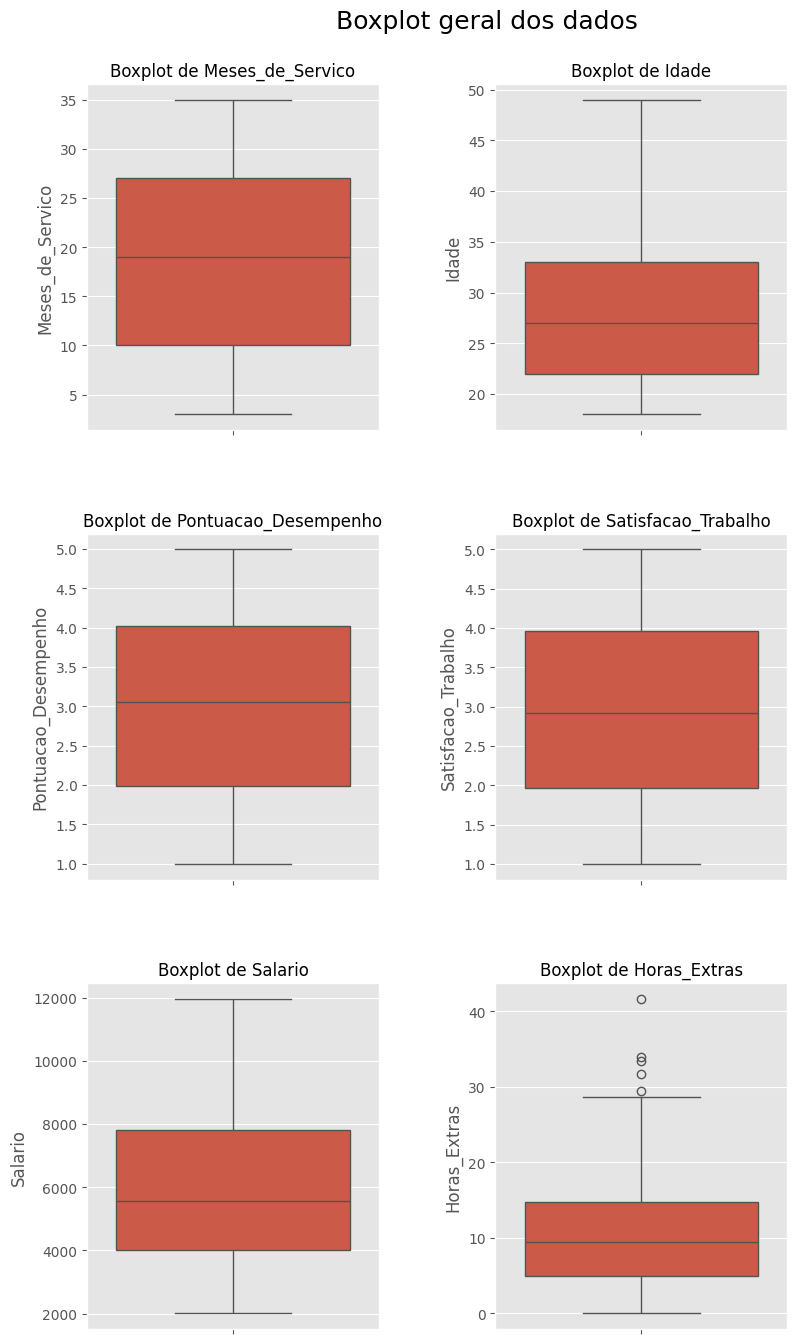

In [ ]:
num_cols = 2
num_rows = 3



fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
plt.suptitle('Boxplot geral dos dados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.boxplot(y=data[col], ax=ax)
    ax.set_title(f'Boxplot de {col}', fontsize=12)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show();

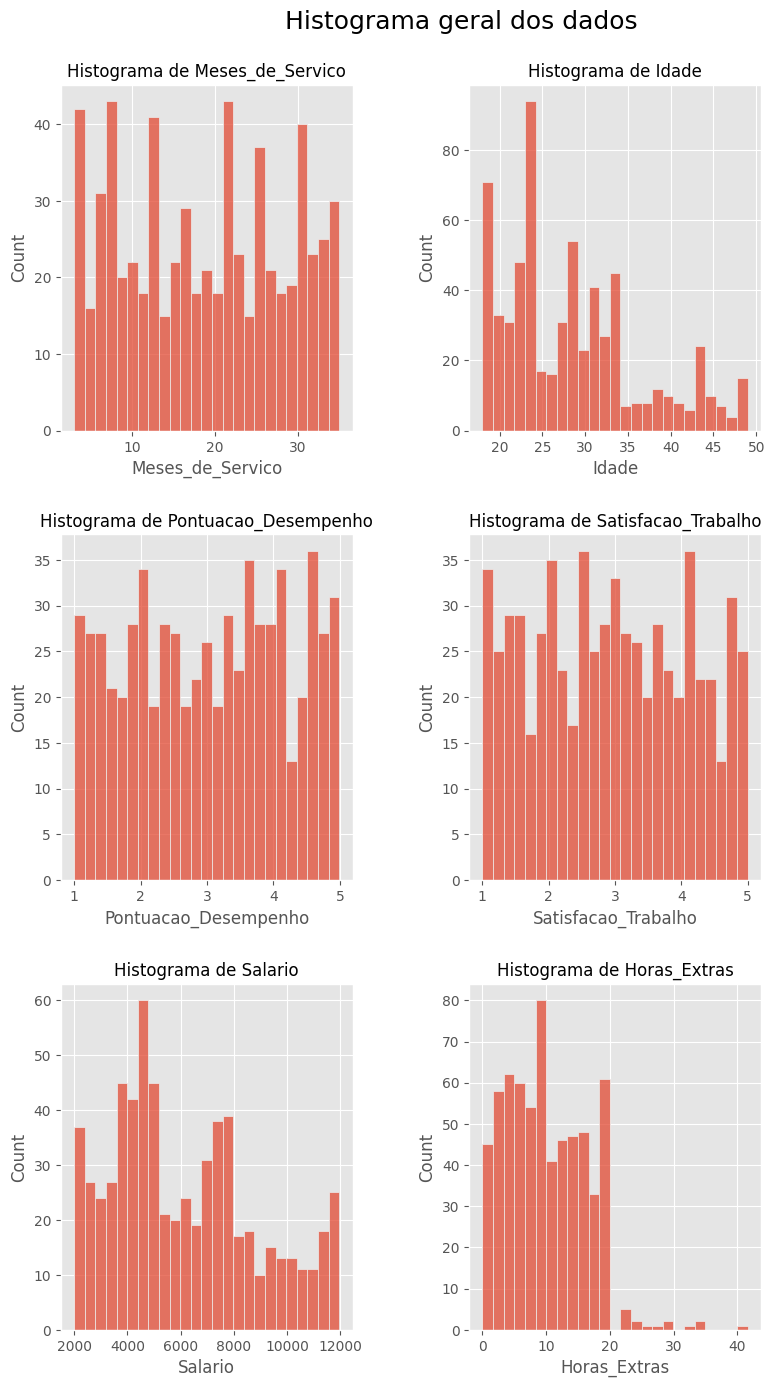

In [ ]:
num_cols = 2
num_rows = 3


fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

plt.suptitle('Histograma geral dos dados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.histplot(data[col], kde=False, ax=ax, bins=25)
    ax.set_title(f'Histograma de {col}',fontsize=12)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)


plt.show()

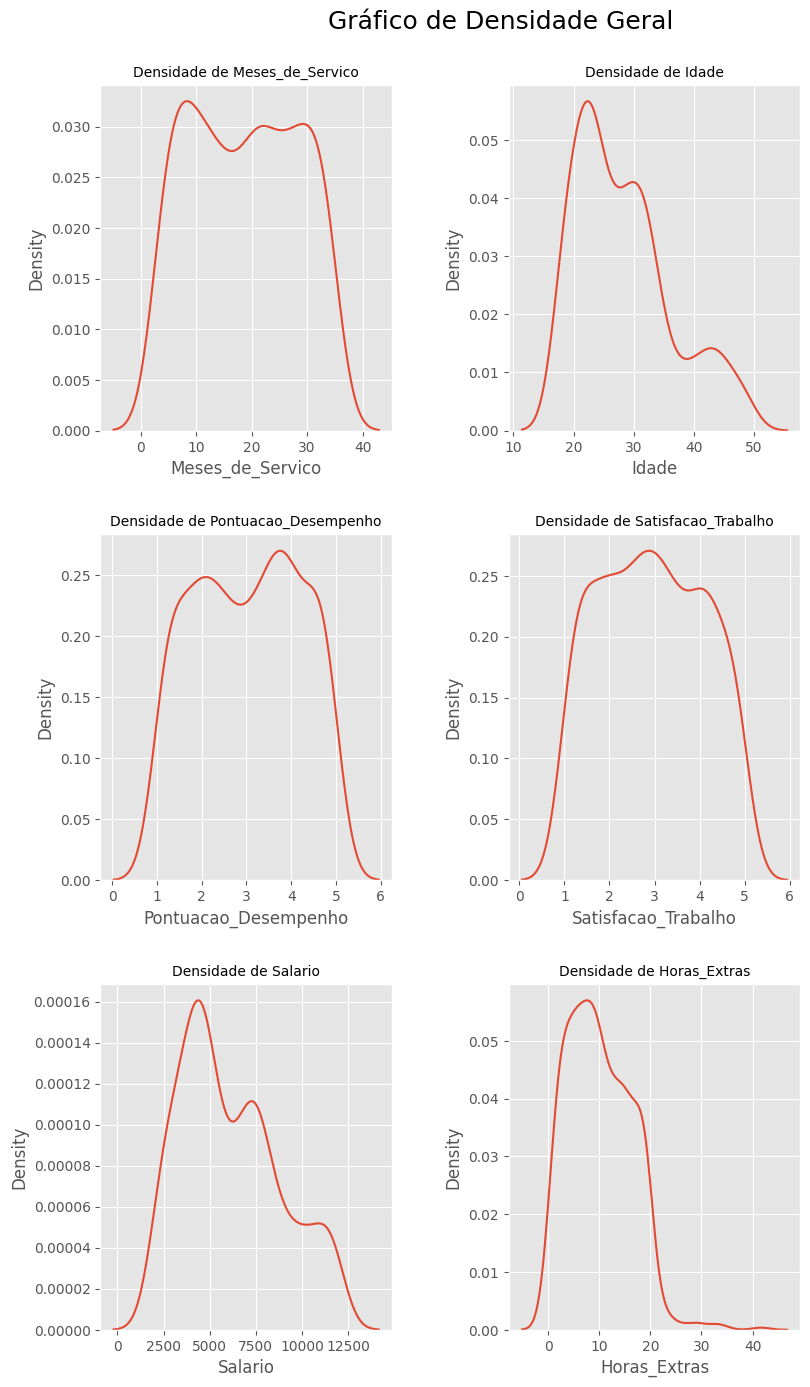

In [ ]:
num_cols = 2
num_rows = 3


fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

plt.suptitle('Gráfico de Densidade Geral', fontsize=18)


axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.kdeplot(data[col], ax=ax)
    ax.set_title(f'Densidade de {col}',fontsize=10)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)


plt.show()

In [ ]:
cargo = round(data['Nivel_Cargo'].value_counts( normalize=True ) * 100, 1 )
status = round(data['Status'].value_counts( normalize=True ) * 100, 1 )

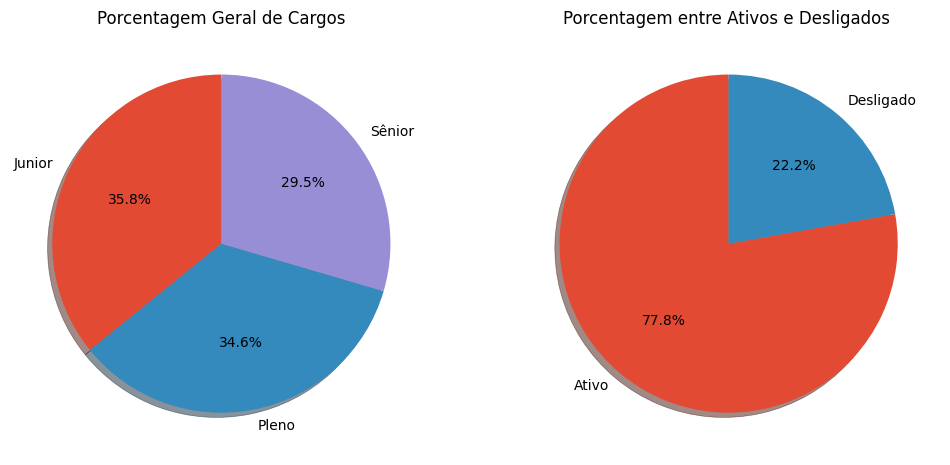

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.title('Porcentagem Geral de Cargos', fontsize=12)
plt.pie(
    cargo,
    labels = cargo.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);


plt.subplot(1, 2, 2)
plt.title('Porcentagem entre Ativos e Desligados ', fontsize=12)
plt.pie(
    status,
    labels = status.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);



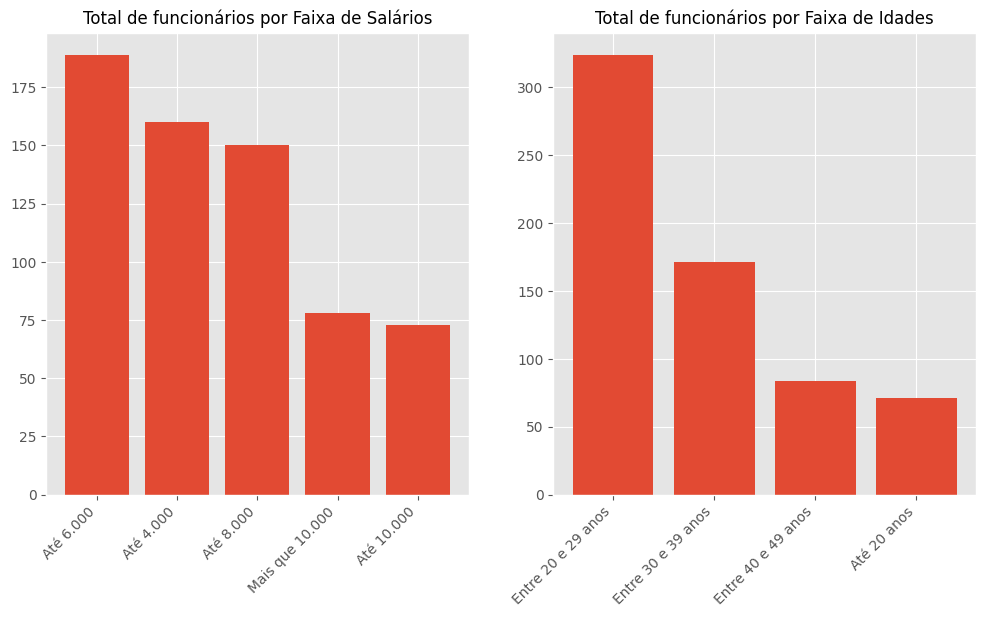

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.title("Total de funcionários por Faixa de Salários", fontsize = 12)
plt.bar( data['Faixa_Salario'].value_counts().index, data['Faixa_Salario'].value_counts());
plt.xticks( rotation=45, ha='right' );
plt.show;


plt.subplot(1, 2, 2)
plt.title("Total de funcionários por Faixa de Idades", fontsize = 12)
plt.bar( data['Faixa_Idades'].value_counts().index, data['Faixa_Idades'].value_counts());
plt.xticks( rotation=45, ha='right' );
plt.show;



#Análise Univariada Ativos x Desligados

In [ ]:
data_d = data['Status'] == 'Desligado'
data_a = data['Status'] == 'Ativo'

data_d = data[data_d]
data_a = data[data_a]
data.head()

Data_Contratacao Data_Desligamento  Meses_de_Servico  Idade  \
0       2024-02-14               NaT                 3     24   
1       2023-11-16        2024-05-14                 6     43   
2       2023-11-16               NaT                 6     45   
3       2023-05-20               NaT                12     31   
4       2022-07-24               NaT                22     37   

   Pontuacao_Desempenho  Satisfacao_Trabalho Nivel_Cargo  Salario  \
0              2.066788             2.043644       Pleno  4994.41   
1              3.256257             1.711719      Sênior  8798.34   
2              4.827732             3.480214      Sênior  8891.02   
3              1.453944             1.617558       Pleno  7606.22   
4              2.088917             2.763390      Sênior  9236.03   

   Horas_Extras  Desligamento     Status Faixa_Salario        Faixa_Idades  
0     15.465241             0      Ativo     Até 6.000  Entre 20 e 29 anos  
1     19.036627             1  Desligado    Até 10.000  Entre 40 e 49 anos  
2     13.326408             0      Ativo    Até 10.000  Entre 40 e 49 anos  
3     14.209663             0      Ativo     Até 8.000  Entre 30 e 39 anos  
4     11.059687             0      Ativo    Até 10.000  Entre 30 e 39 anos

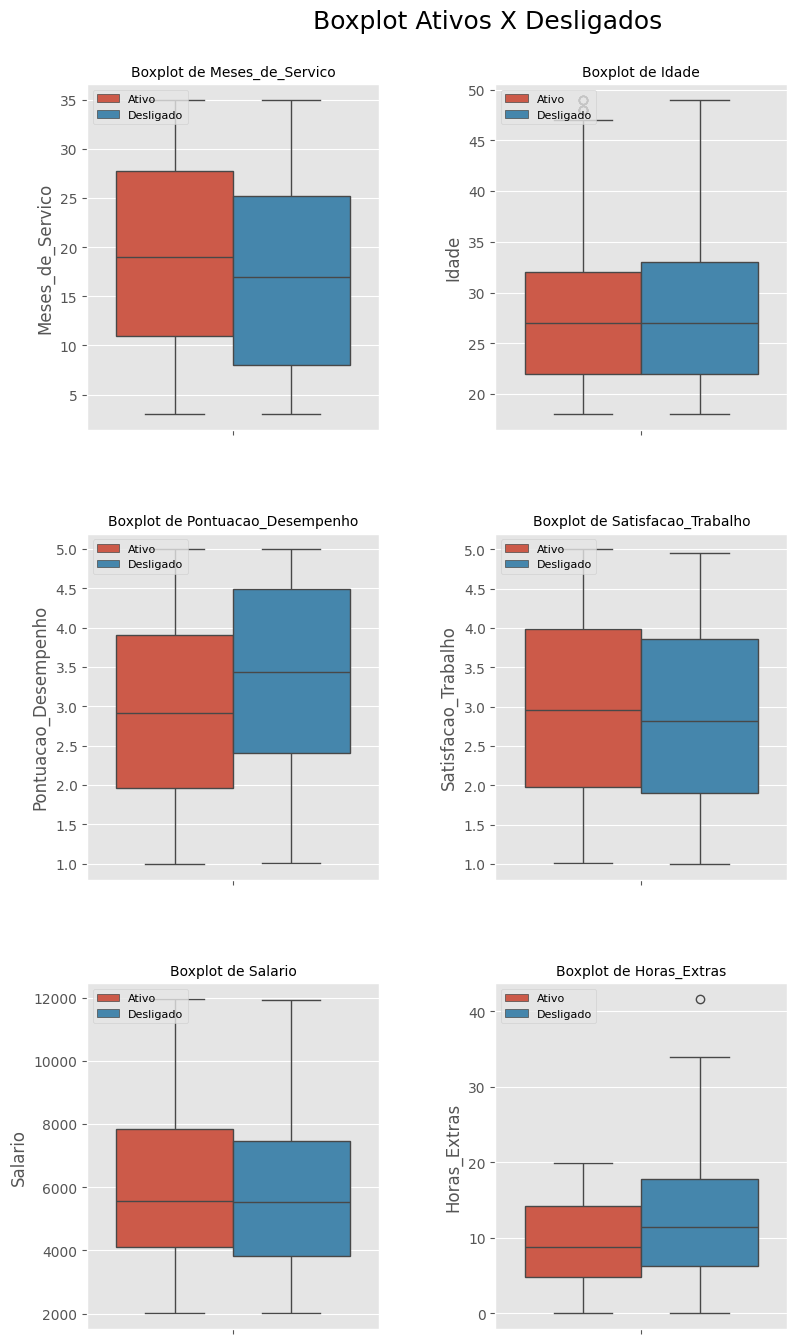

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
plt.suptitle('Boxplot Ativos X Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.boxplot(y=data[col], ax=ax, hue= data['Status'])
    ax.set_title(f'Boxplot de {col}', fontsize=10)
    ax.legend(loc='upper left', fontsize=8)

plt.tight_layout()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)


plt.show()

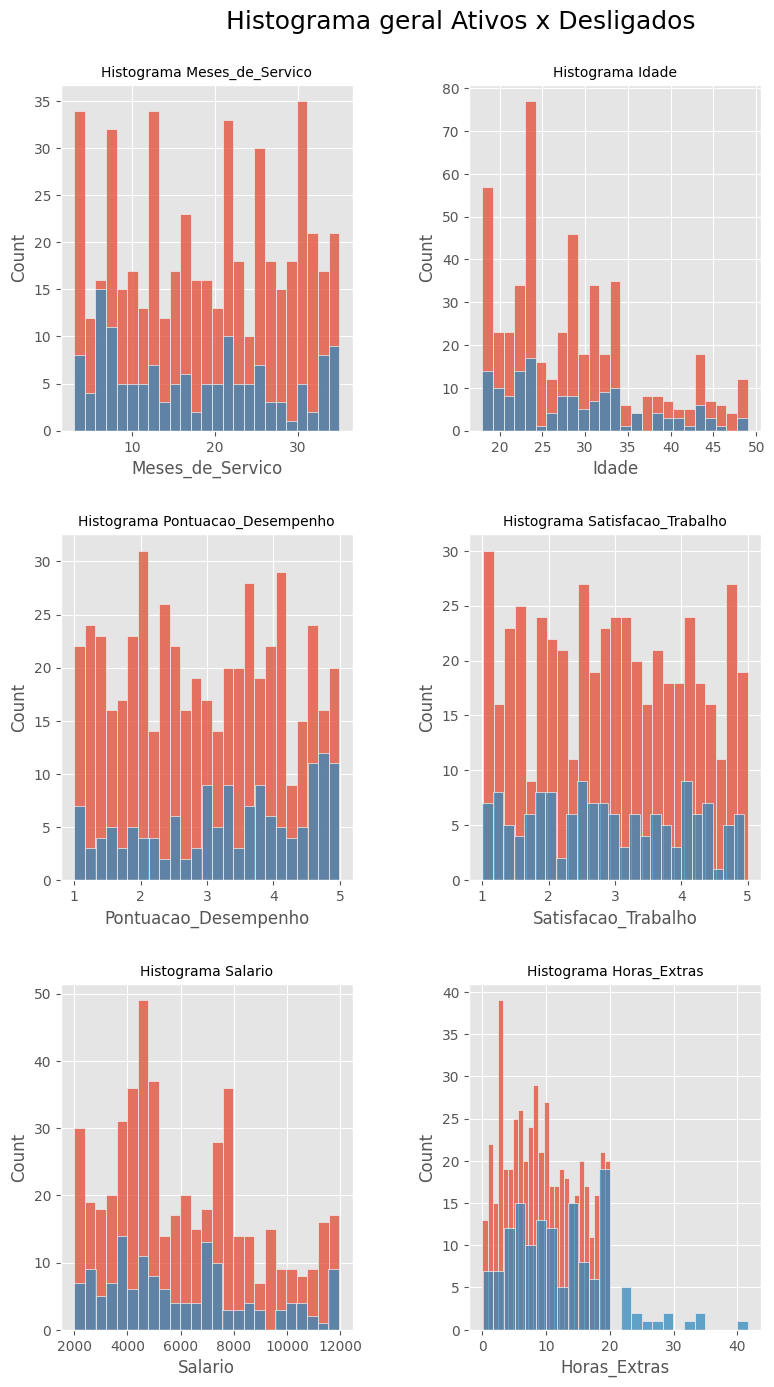

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
fig.suptitle('Histograma geral Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.histplot(data_a[col], kde=False, ax=ax, bins=25)
    sns.histplot(data_d[col], kde=False, ax=ax, bins=25)
    ax.set_title(f'Histograma {col}', fontsize=10)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)


plt.show()

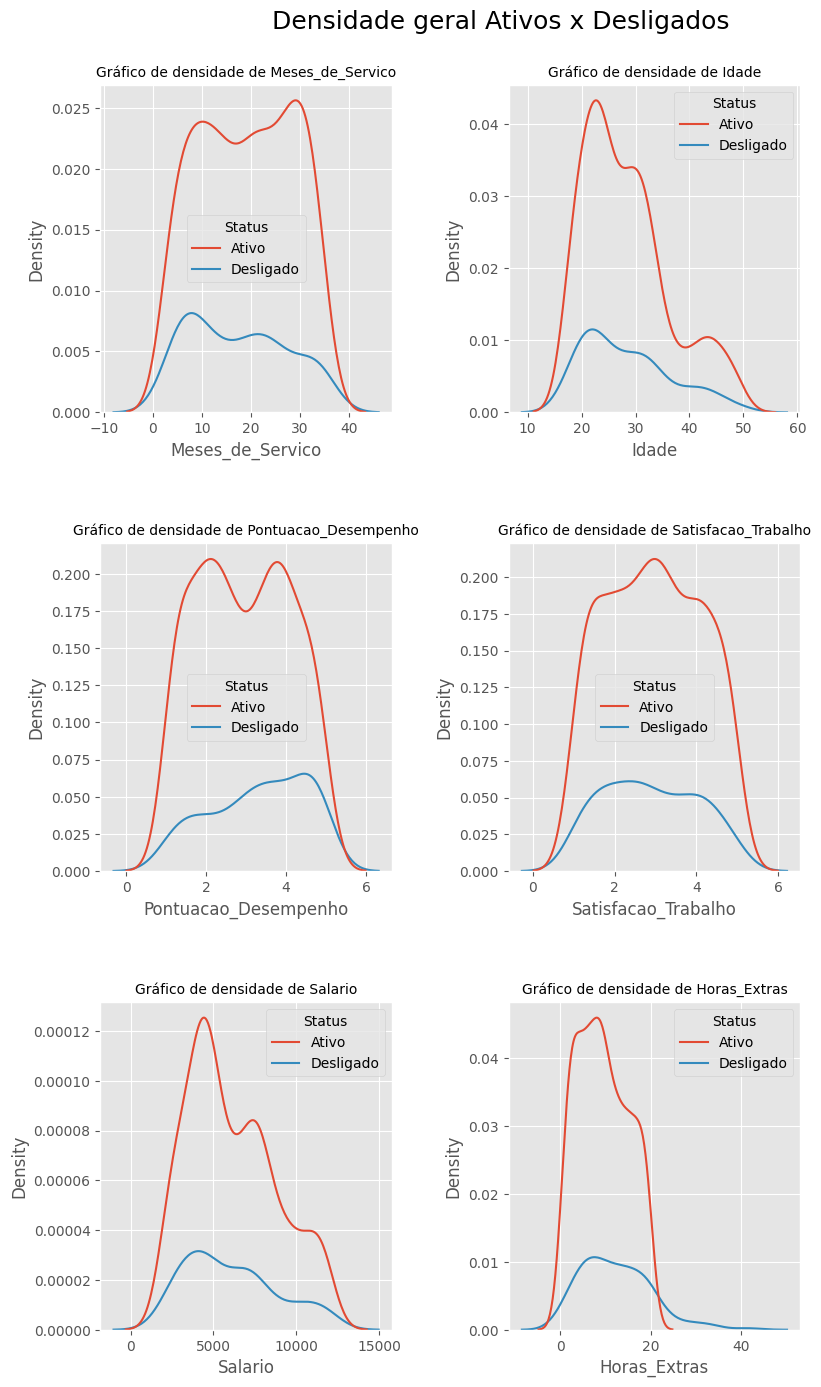

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
fig.suptitle('Densidade geral Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.kdeplot(data=data, ax=ax , x=col, hue='Status')
    ax.set_title(f'Gráfico de densidade de {col}', fontsize=10)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.4)


plt.show();

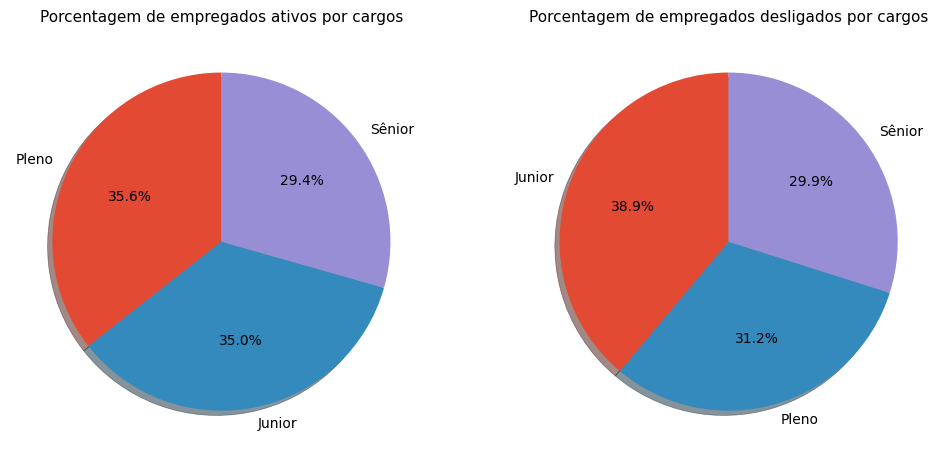

In [ ]:
nivel_a = round(data_a['Nivel_Cargo'].value_counts( normalize=True ) * 100, 1 )
nivel_d = round(data_d['Nivel_Cargo'].value_counts( normalize=True ) * 100, 1 )

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.title('Porcentagem de empregados ativos por cargos',fontsize=11)
plt.pie(
    nivel_a,
    labels = nivel_a.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);


plt.subplot(1, 2, 2)
plt.title('Porcentagem de empregados desligados por cargos', fontsize=11)
plt.pie(
    nivel_d,
    labels = nivel_d.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

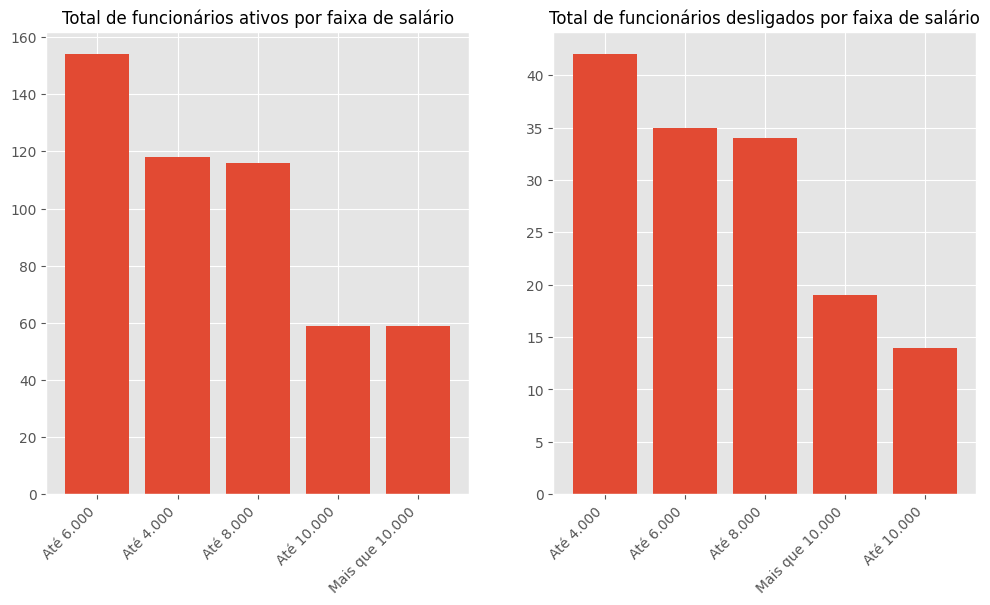

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Total de funcionários ativos por faixa de salário", fontsize=12)
plt.bar( data_a['Faixa_Salario'].value_counts().index, data_a['Faixa_Salario'].value_counts());
plt.xticks( rotation=45, ha='right' );
plt.show;

plt.subplot(1, 2, 2)
plt.title("Total de funcionários desligados por faixa de salário", fontsize=12)
plt.bar( data_d['Faixa_Salario'].value_counts().index, data_d['Faixa_Salario'].value_counts());
plt.xticks( rotation=45, ha='right' );
plt.show;


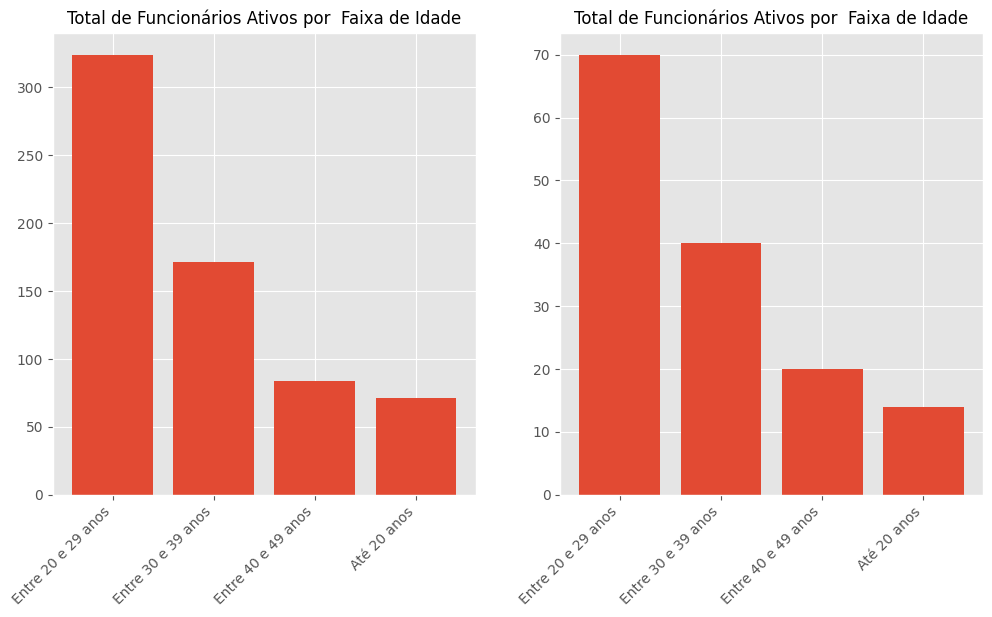

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar( data_a['Faixa_Idades'].value_counts().index, data['Faixa_Idades'].value_counts());
plt.title("Total de Funcionários Ativos por  Faixa de Idade", fontsize=12)
plt.xticks( rotation=45, ha='right' );
plt.show;

plt.subplot(1, 2, 2)
plt.bar( data_d['Faixa_Idades'].value_counts().index, data_d['Faixa_Idades'].value_counts());
plt.title("Total de Funcionários Ativos por  Faixa de Idade", fontsize=12)
plt.xticks( rotation=45, ha='right' );
plt.show;

#Análise Bivariada Geral

In [ ]:
data.head()

Data_Contratacao Data_Desligamento  Meses_de_Servico  Idade  \
0       2024-02-14               NaT                 3     24   
1       2023-11-16        2024-05-14                 6     43   
2       2023-11-16               NaT                 6     45   
3       2023-05-20               NaT                12     31   
4       2022-07-24               NaT                22     37   

   Pontuacao_Desempenho  Satisfacao_Trabalho Nivel_Cargo  Salario  \
0              2.066788             2.043644       Pleno  4994.41   
1              3.256257             1.711719      Sênior  8798.34   
2              4.827732             3.480214      Sênior  8891.02   
3              1.453944             1.617558       Pleno  7606.22   
4              2.088917             2.763390      Sênior  9236.03   

   Horas_Extras  Desligamento     Status Faixa_Salario        Faixa_Idades  
0     15.465241             0      Ativo     Até 6.000  Entre 20 e 29 anos  
1     19.036627             1  Desligado    Até 10.000  Entre 40 e 49 anos  
2     13.326408             0      Ativo    Até 10.000  Entre 40 e 49 anos  
3     14.209663             0      Ativo     Até 8.000  Entre 30 e 39 anos  
4     11.059687             0      Ativo    Até 10.000  Entre 30 e 39 anos

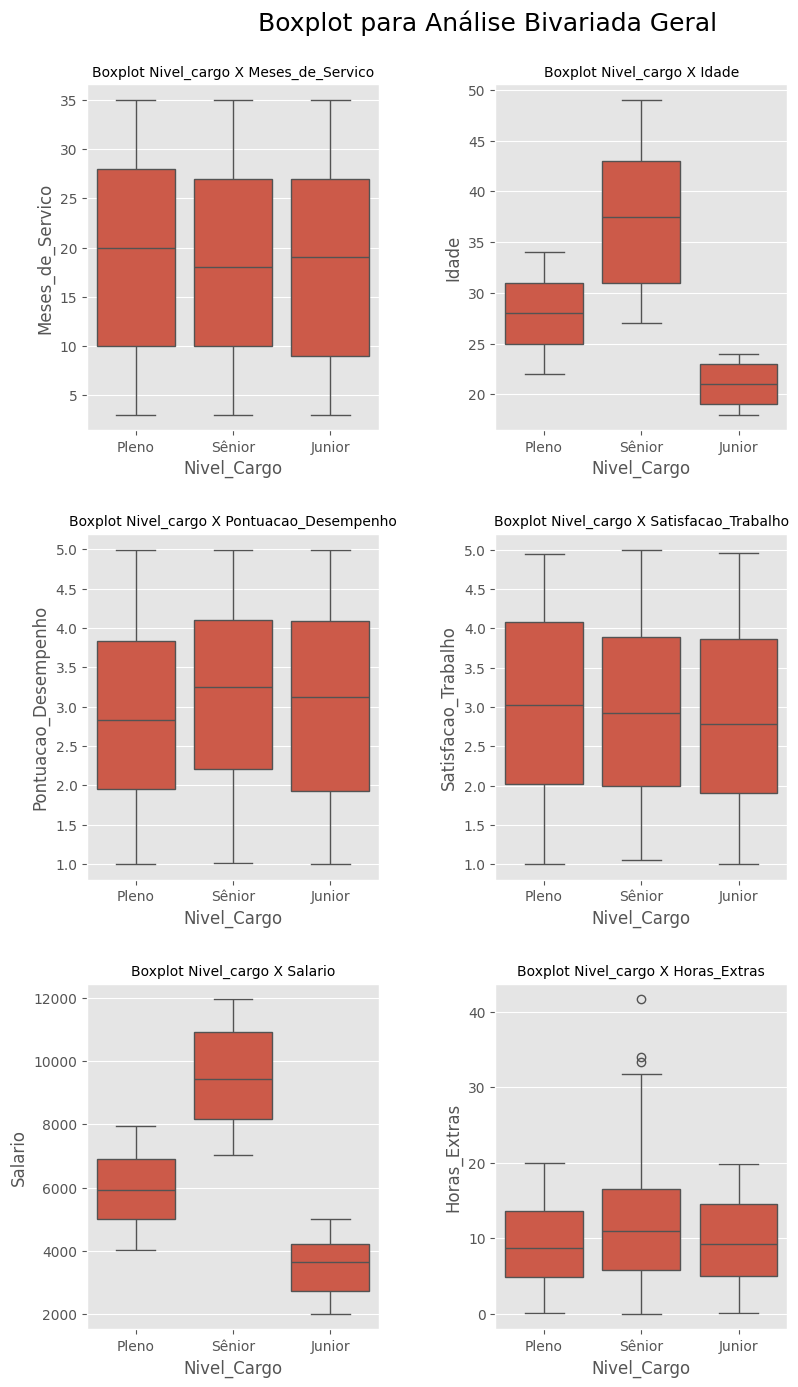

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

axes = axes.flatten()

fig.suptitle('Boxplot para Análise Bivariada Geral', fontsize=18)

for ax, col in zip(axes, lista):
    sns.boxplot(x='Nivel_Cargo',ax=ax,y=col, data=data)
    ax.set_title('Boxplot Nivel_cargo X {}'.format(col), fontsize=10)
    plt.ylabel(col)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

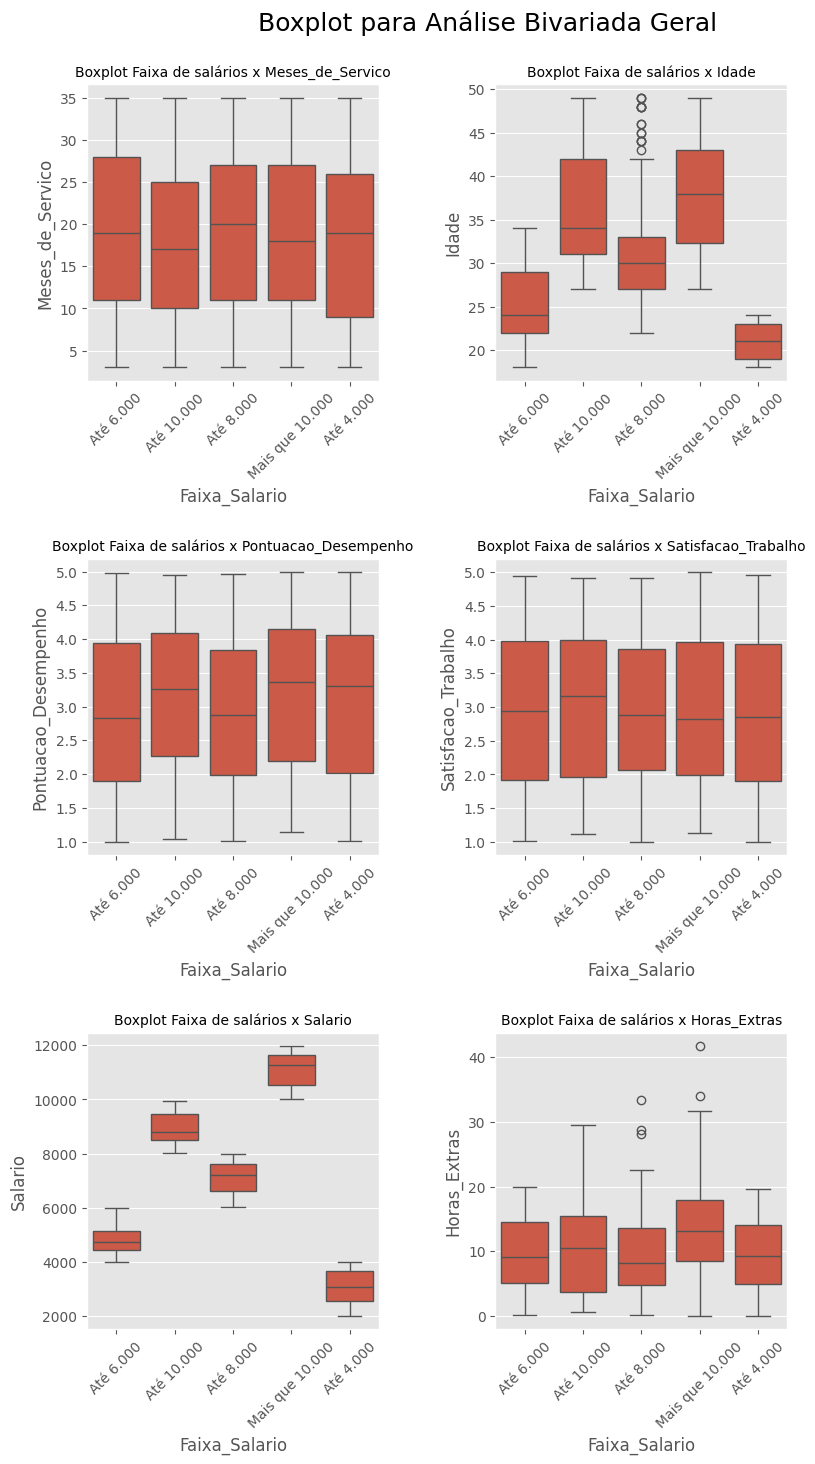

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
fig.suptitle('Boxplot para Análise Bivariada Geral', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.boxplot(x='Faixa_Salario',ax=ax,y=col, data=data)
    ax.set_title('Boxplot Faixa de salários x {}'.format(col),fontsize=10)
    plt.ylabel(col)
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.6)

plt.show()

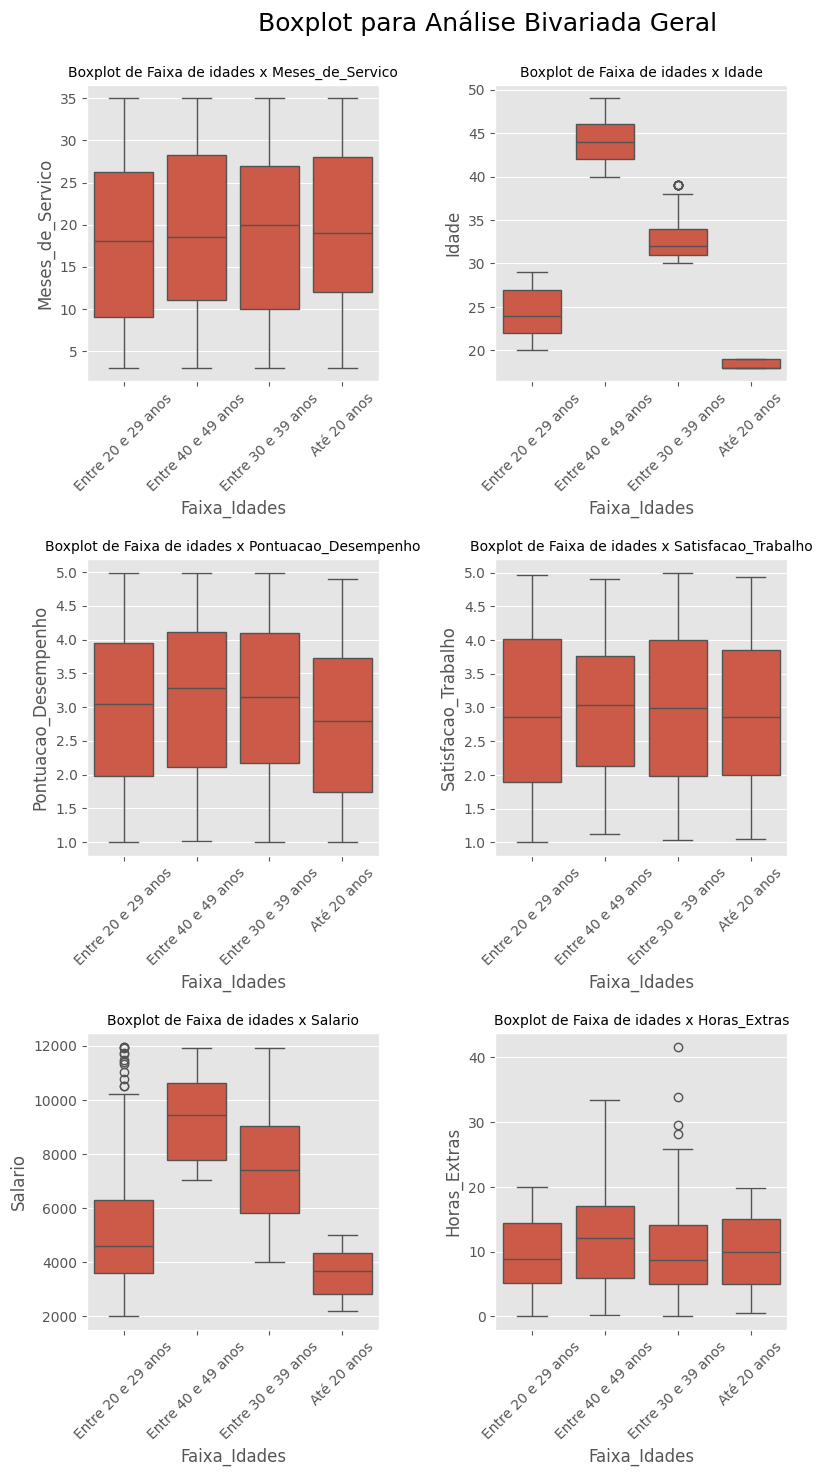

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
fig.suptitle('Boxplot para Análise Bivariada Geral', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.boxplot(x='Faixa_Idades',ax=ax,y=col, data=data)
    ax.set_title('Boxplot de Faixa de idades x {}'.format(col), fontsize=10)
    plt.ylabel(col)
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.6)


plt.show()

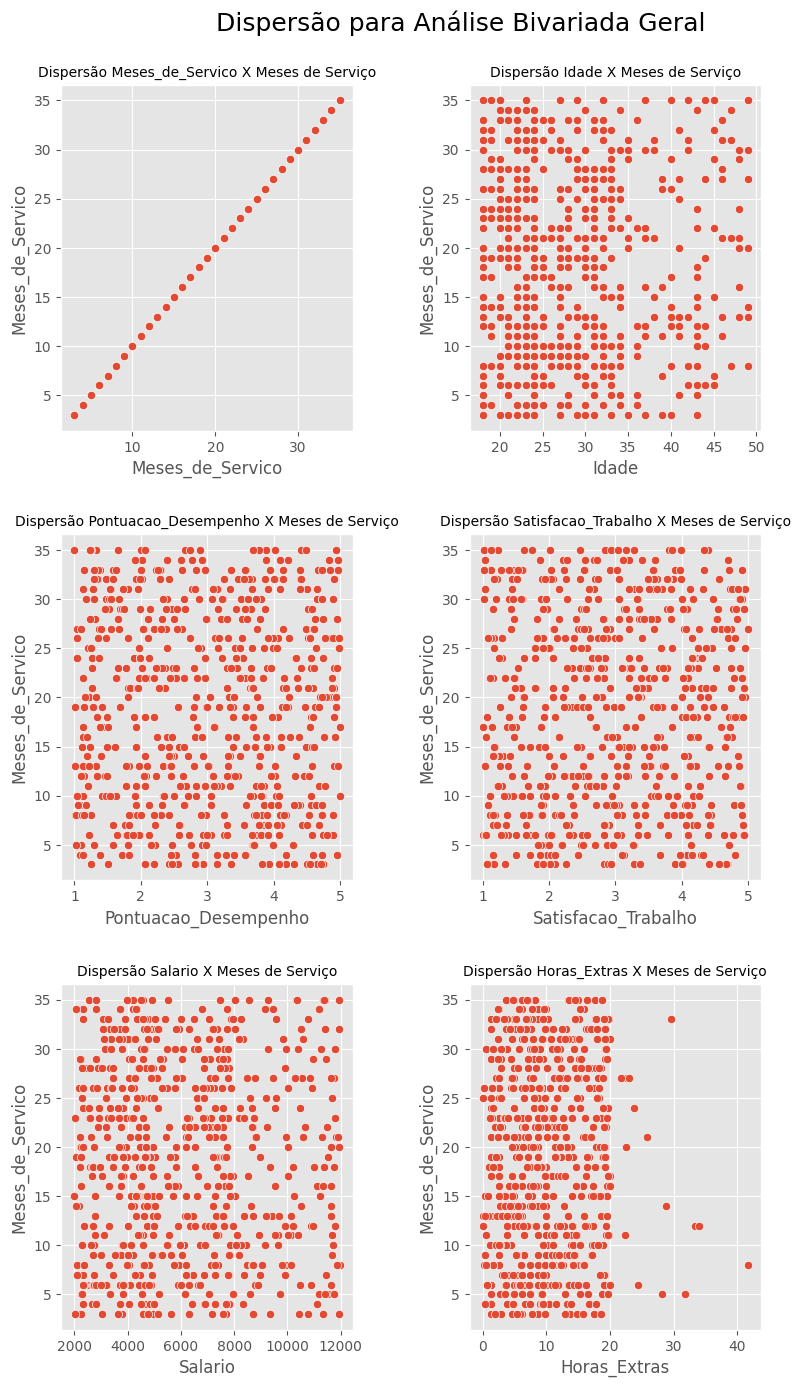

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão para Análise Bivariada Geral', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Meses_de_Servico'], ax=ax)
    ax.set_title("Dispersão {} X Meses de Serviço".format(col), fontsize=10)
    plt.xlabel(col)


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

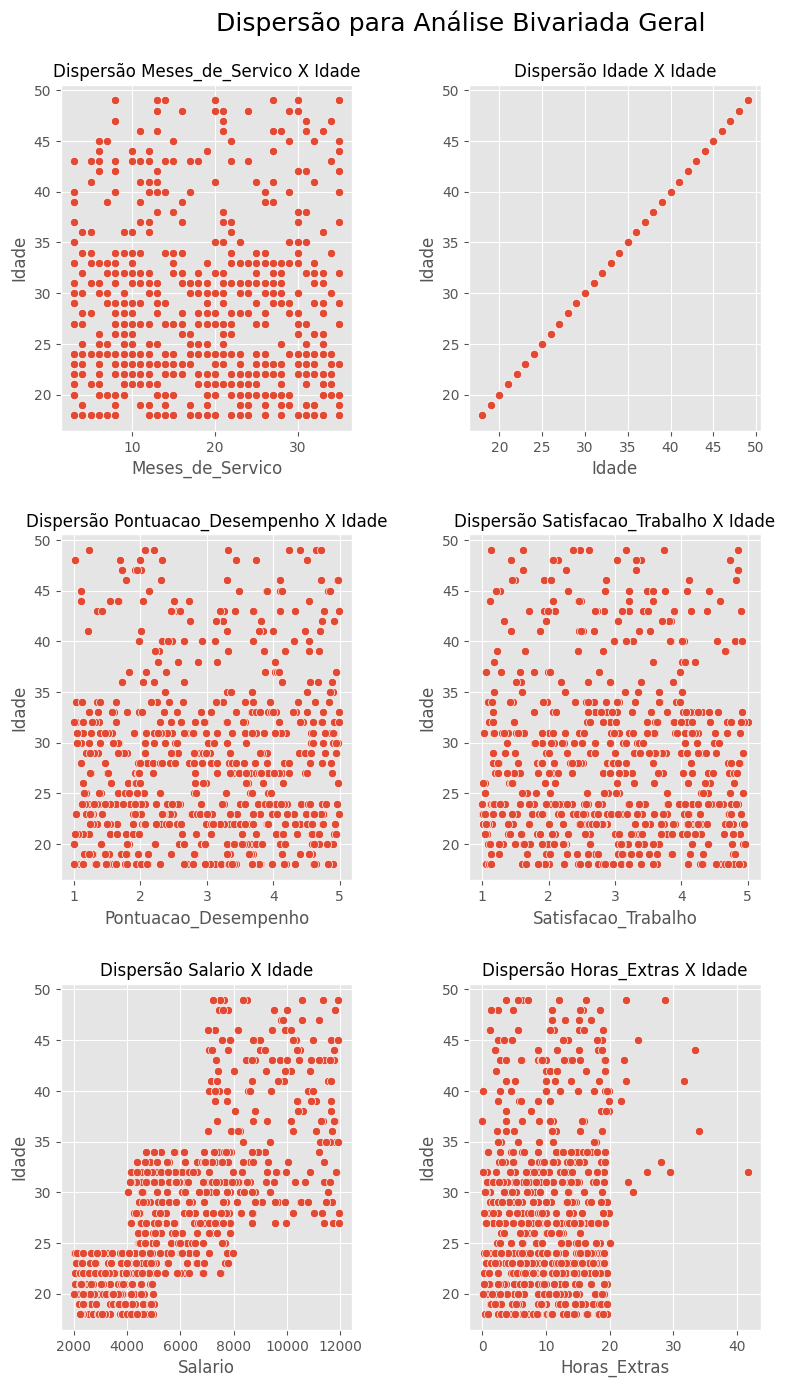

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão para Análise Bivariada Geral', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Idade'], ax=ax)
    ax.set_title("Dispersão {} X Idade".format(col), fontsize=12)
    plt.xlabel(col)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

In [ ]:
lista

['Meses_de_Servico',
 'Idade',
 'Pontuacao_Desempenho',
 'Satisfacao_Trabalho',
 'Salario',
 'Horas_Extras']

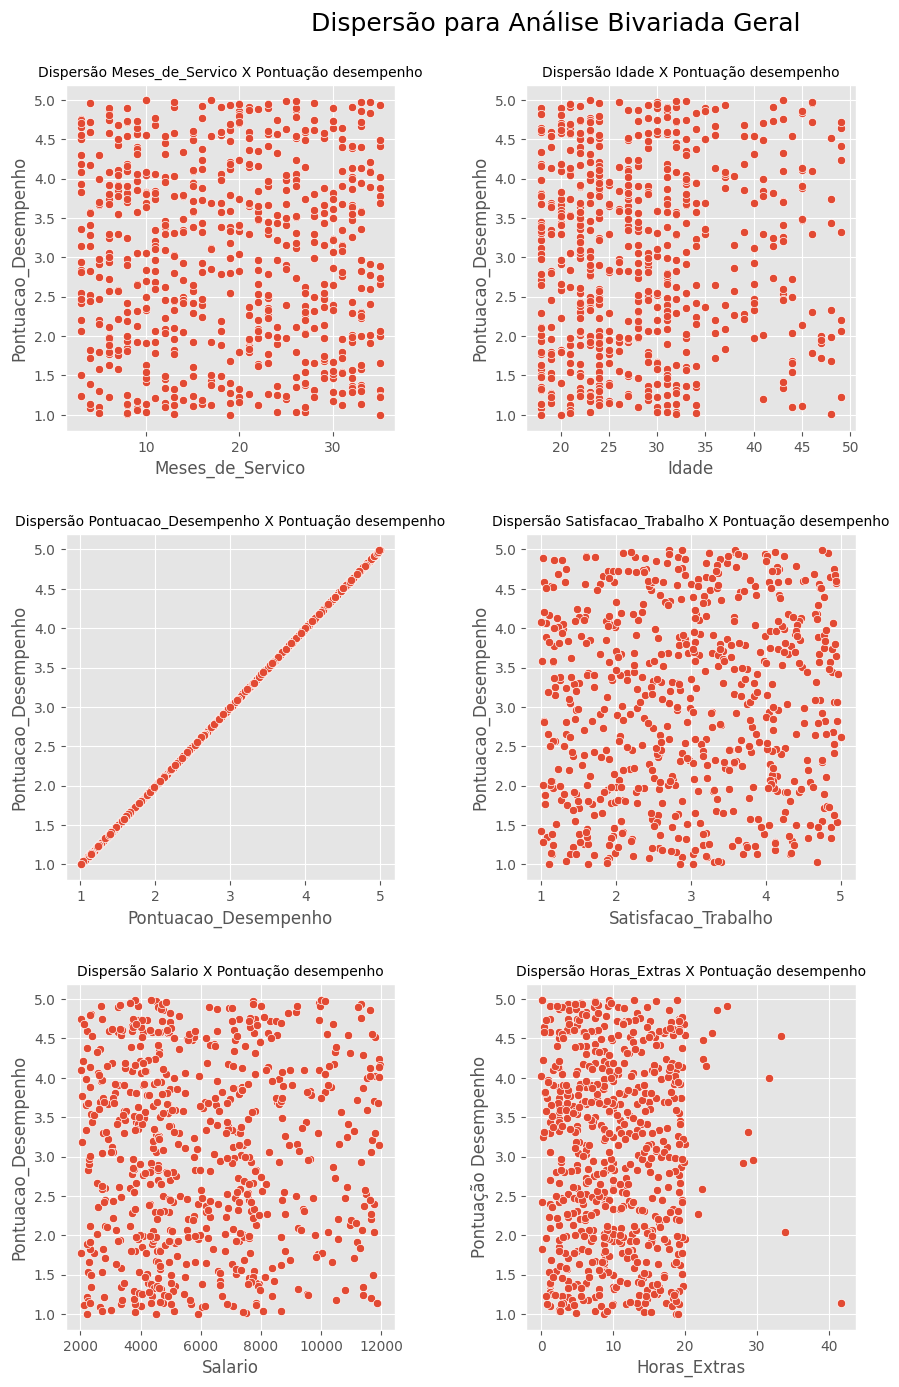

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão para Análise Bivariada Geral', fontsize=18,)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Pontuacao_Desempenho'], ax=ax)
    ax.set_title("Dispersão {} X Pontuação desempenho".format(col), fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Pontuação Desempenho')


plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

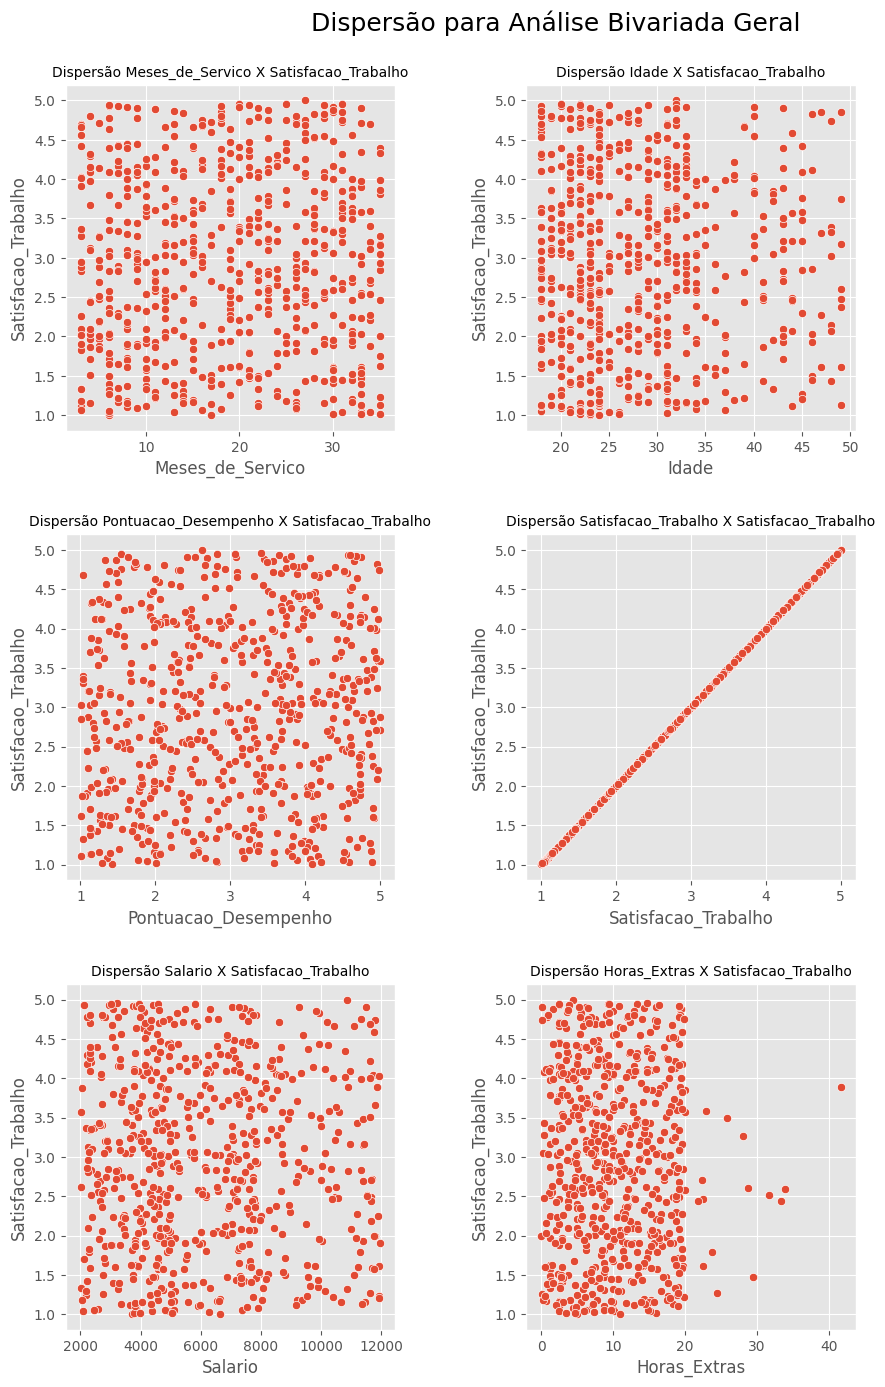

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão para Análise Bivariada Geral', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Satisfacao_Trabalho'], ax=ax)
    ax.set_title("Dispersão {} X Satisfacao_Trabalho".format(col),fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Satisfacao_Trabalho')

plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

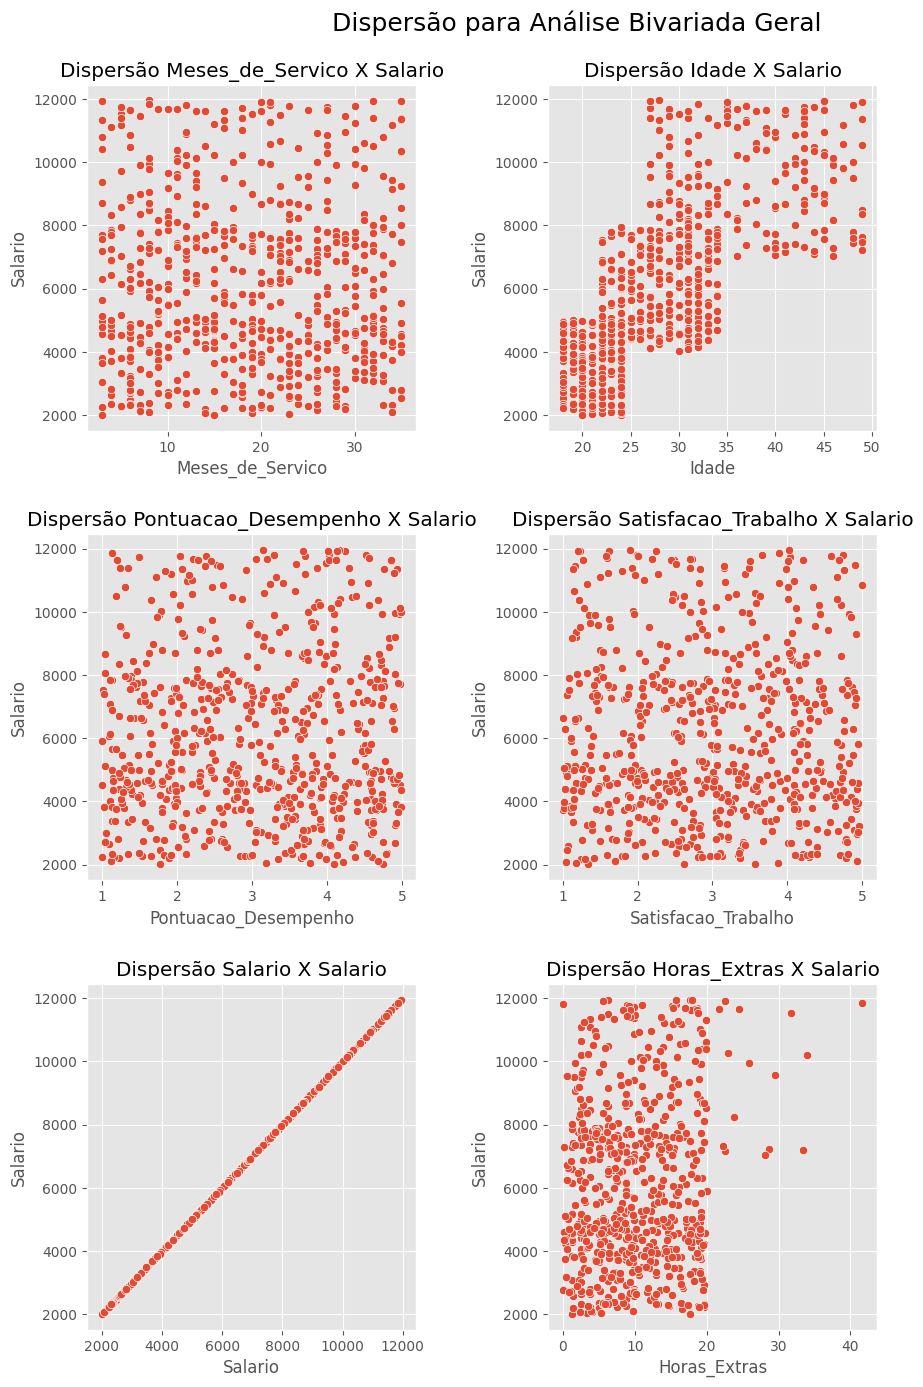

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão para Análise Bivariada Geral', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Salario'], ax=ax)
    ax.set_title("Dispersão {} X Salario".format(col))
    plt.xlabel(col)
    plt.ylabel('Salario')

plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

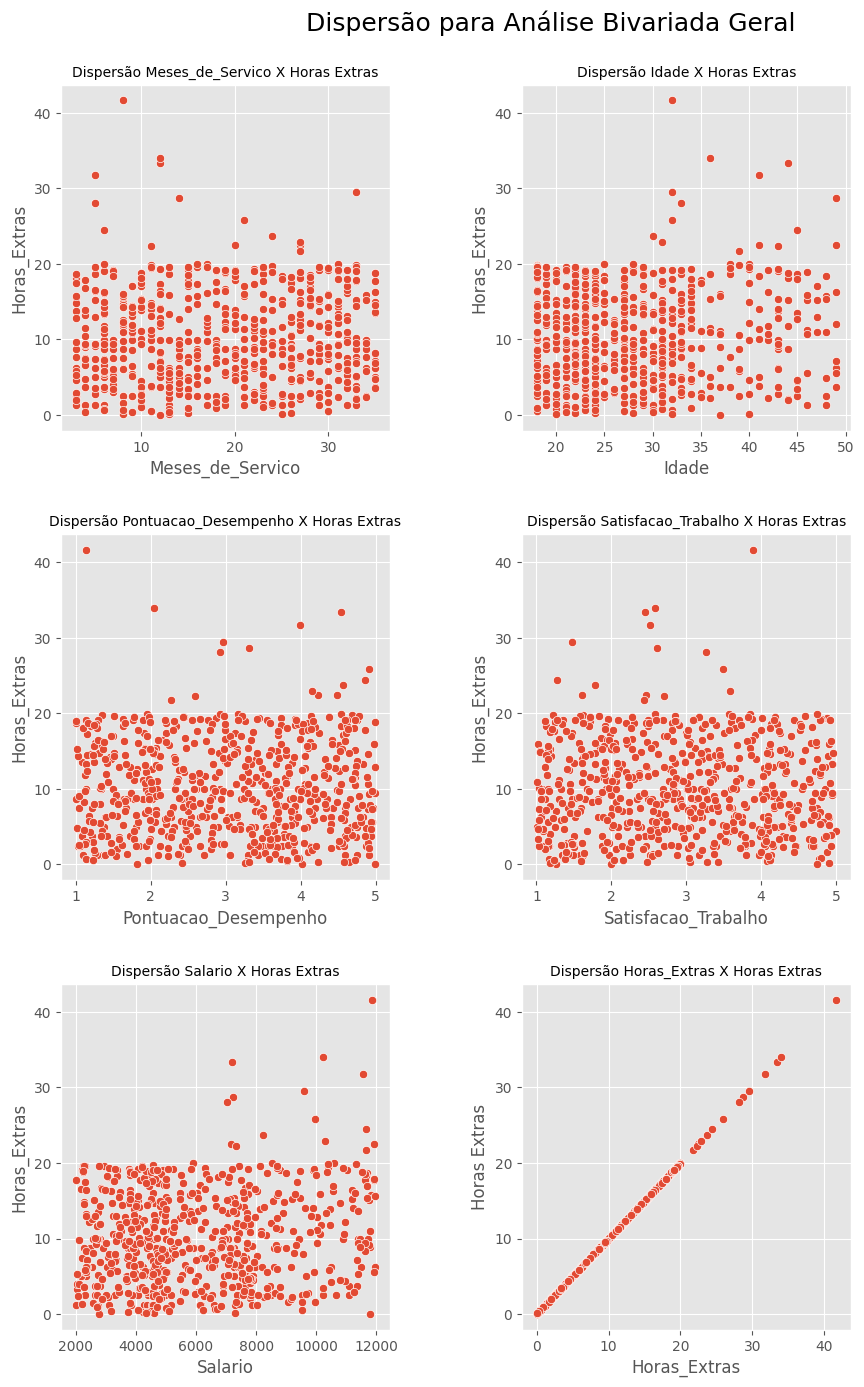

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão para Análise Bivariada Geral', fontsize=18)


axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Horas_Extras'], ax=ax)
    ax.set_title("Dispersão {} X Horas Extras".format(col), fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Horas Extras')

plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

#Análise Bivariada Ativos x Desempregados

In [ ]:
data.head()

Data_Contratacao Data_Desligamento  Meses_de_Servico  Idade  \
0       2024-02-14               NaT                 3     24   
1       2023-11-16        2024-05-14                 6     43   
2       2023-11-16               NaT                 6     45   
3       2023-05-20               NaT                12     31   
4       2022-07-24               NaT                22     37   

   Pontuacao_Desempenho  Satisfacao_Trabalho Nivel_Cargo  Salario  \
0              2.066788             2.043644       Pleno  4994.41   
1              3.256257             1.711719      Sênior  8798.34   
2              4.827732             3.480214      Sênior  8891.02   
3              1.453944             1.617558       Pleno  7606.22   
4              2.088917             2.763390      Sênior  9236.03   

   Horas_Extras  Desligamento     Status Faixa_Salario        Faixa_Idades  
0     15.465241             0      Ativo     Até 6.000  Entre 20 e 29 anos  
1     19.036627             1  Desligado    Até 10.000  Entre 40 e 49 anos  
2     13.326408             0      Ativo    Até 10.000  Entre 40 e 49 anos  
3     14.209663             0      Ativo     Até 8.000  Entre 30 e 39 anos  
4     11.059687             0      Ativo    Até 10.000  Entre 30 e 39 anos

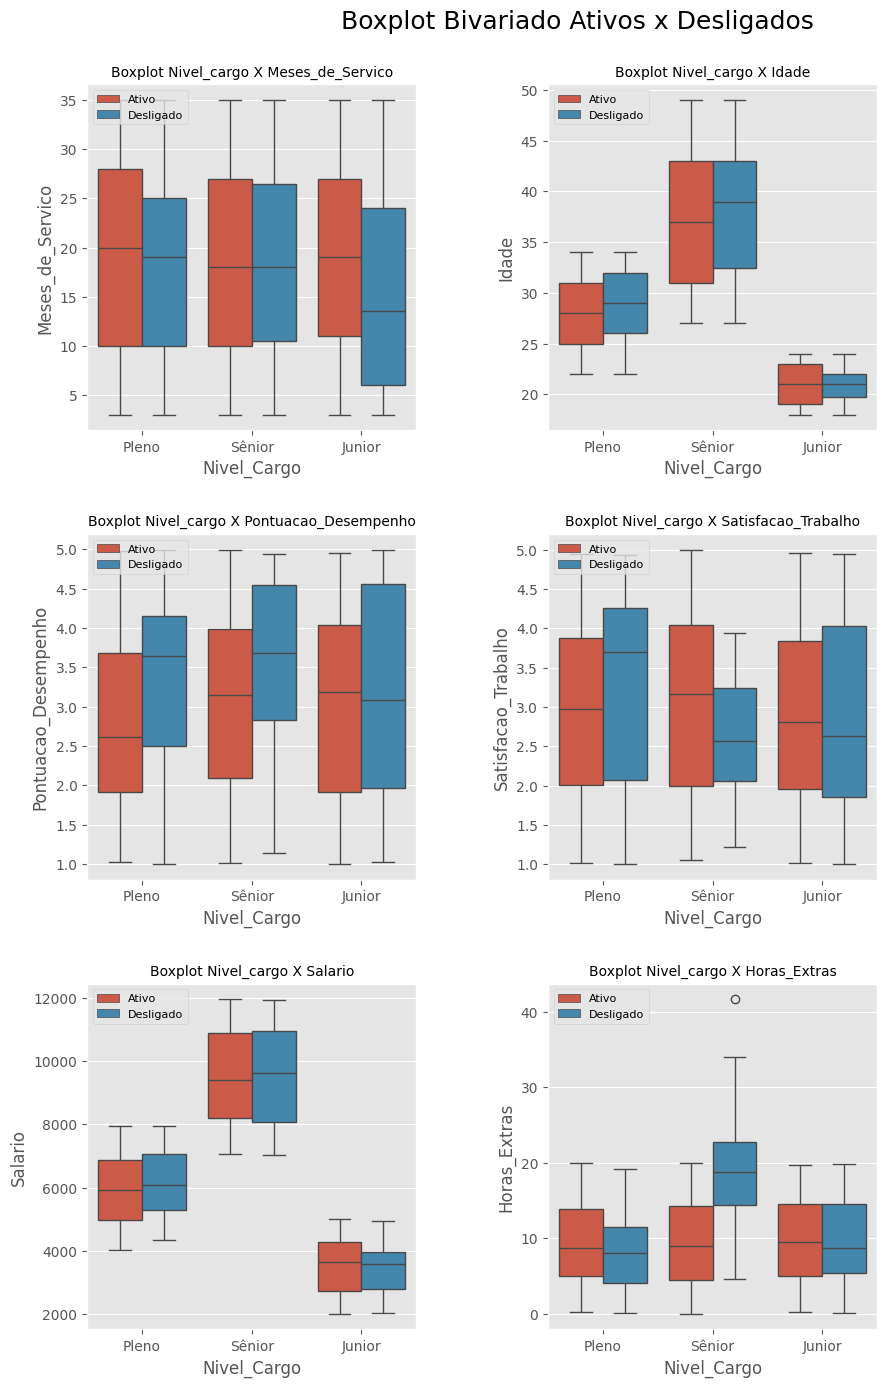

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Boxplot Bivariado Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.boxplot(x='Nivel_Cargo',ax=ax,y=col, data=data, hue="Status")
    ax.set_title('Boxplot Nivel_cargo X {}'.format(col), fontsize=10)
    ax.legend(loc='upper left', fontsize=8)
    plt.ylabel(col)


plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

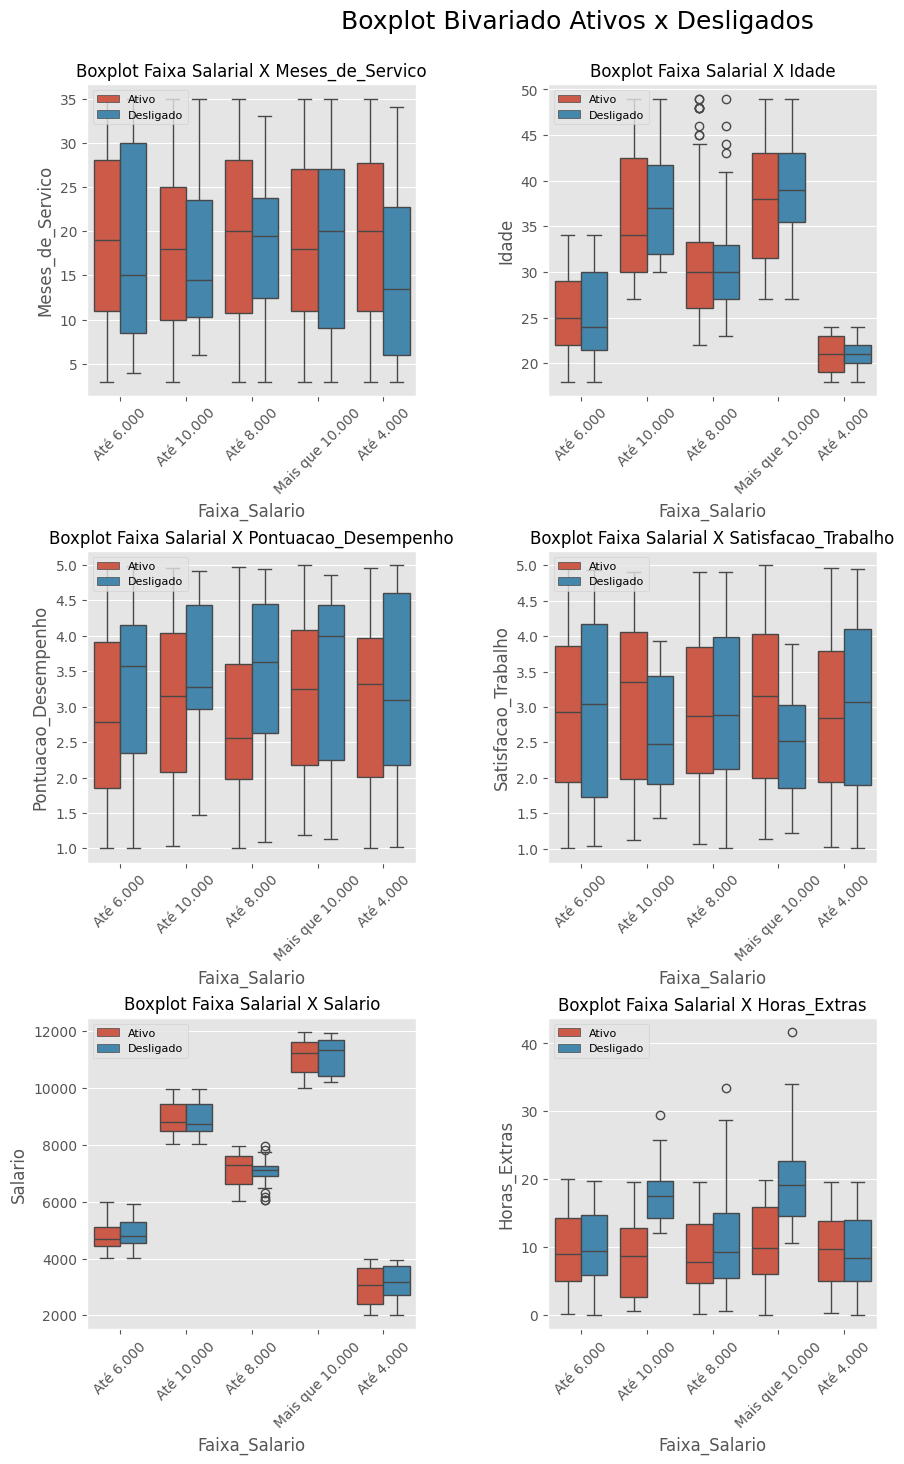

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Boxplot Bivariado Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.boxplot(x='Faixa_Salario',ax=ax,y=col, data=data,hue="Status")
    ax.set_title('Boxplot Faixa Salarial X {}'.format(col), fontsize=12)
    ax.legend(loc='upper left', fontsize=8)
    plt.ylabel(col)
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.5)

plt.show()

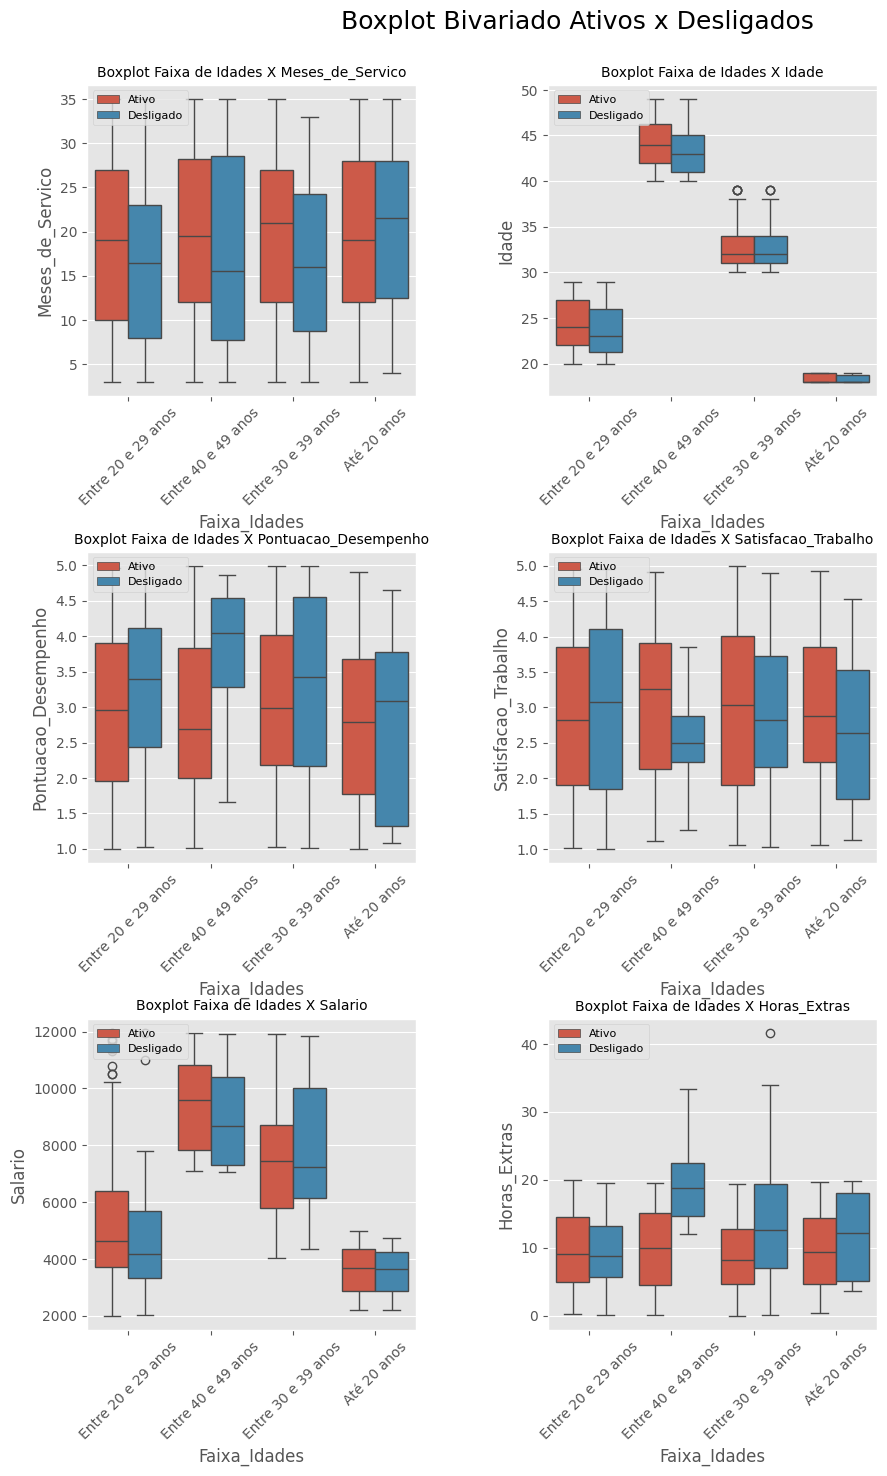

In [ ]:
num_cols = 2
num_rows = 3


fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Boxplot Bivariado Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.boxplot(x='Faixa_Idades',ax=ax,y=col, data=data,hue="Status")
    ax.set_title('Boxplot Faixa de Idades X {}'.format(col), fontsize=10)
    ax.legend(loc='upper left', fontsize=8)
    plt.ylabel(col)
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.5)

plt.show()

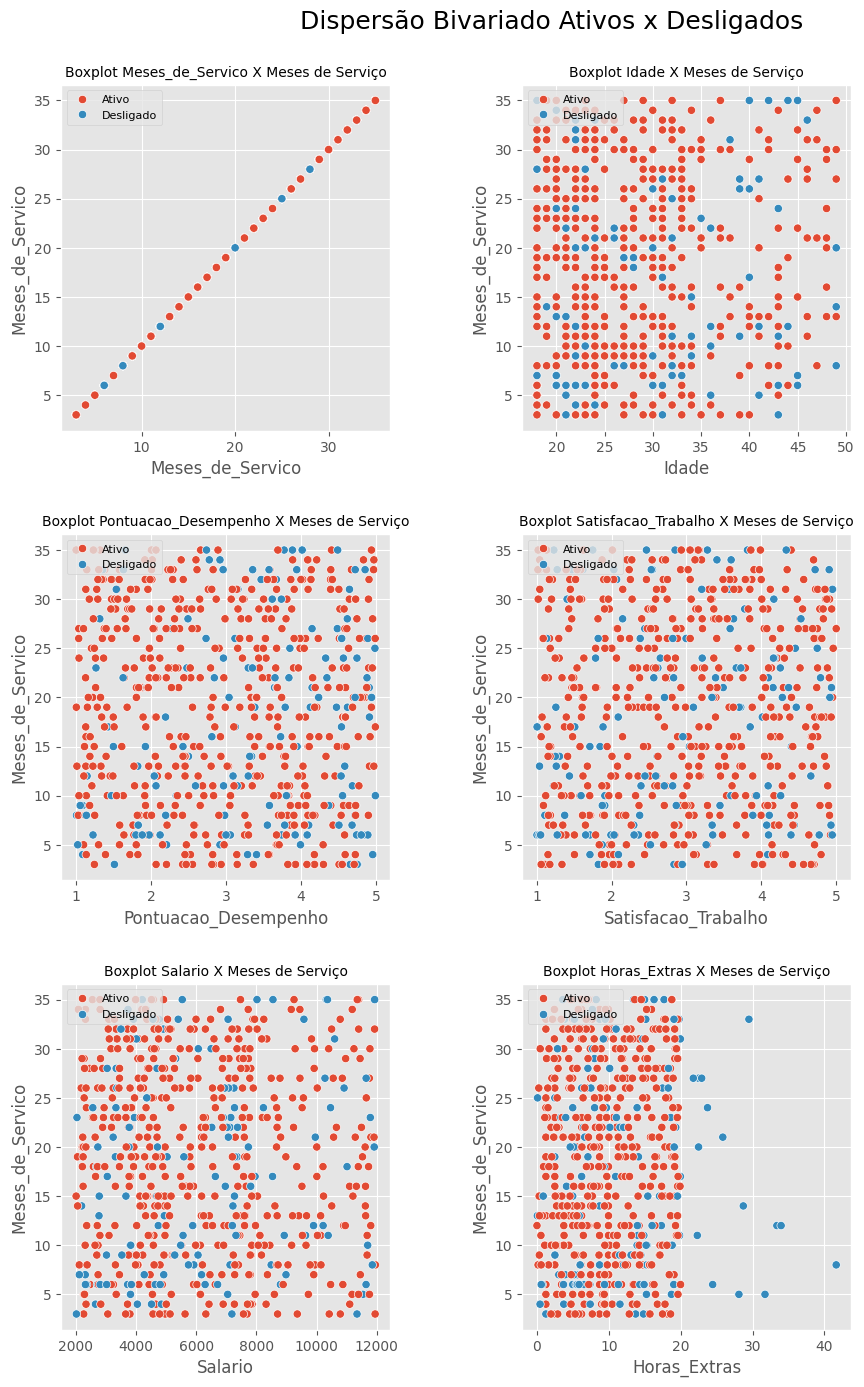

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão Bivariado Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Meses_de_Servico'],hue=data["Status"],ax=ax)
    ax.set_title('Boxplot {} X Meses de Serviço'.format(col), fontsize=10)
    ax.legend(loc='upper left', fontsize=8)
    plt.xlabel(col)


plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

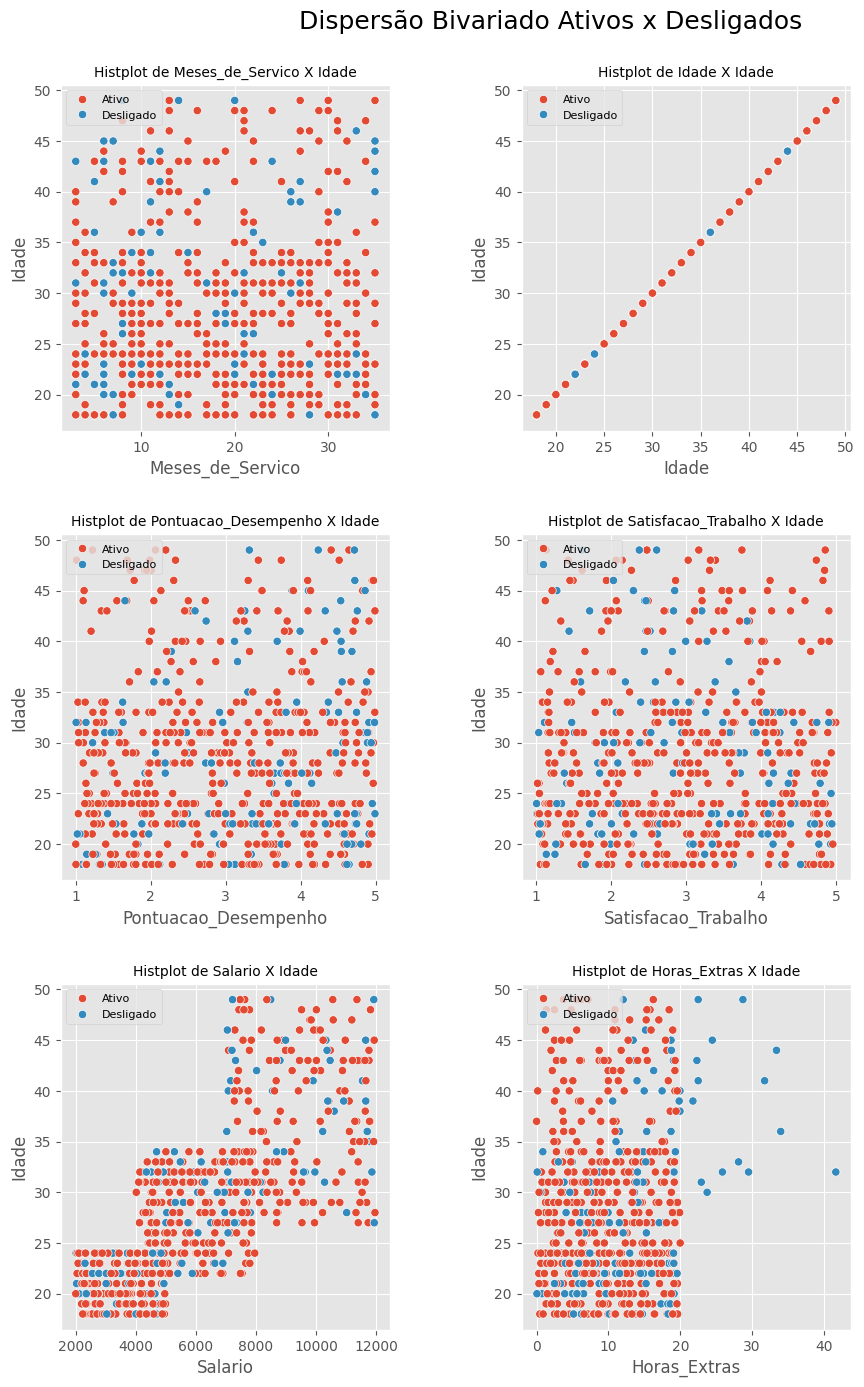

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão Bivariado Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Idade'],hue=data['Status'],ax=ax)
    ax.set_title('Histplot de {} X Idade'.format(col), fontsize=10)
    ax.legend(loc='upper left', fontsize=8)

plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

In [ ]:
lista

['Meses_de_Servico',
 'Idade',
 'Pontuacao_Desempenho',
 'Satisfacao_Trabalho',
 'Salario',
 'Horas_Extras']

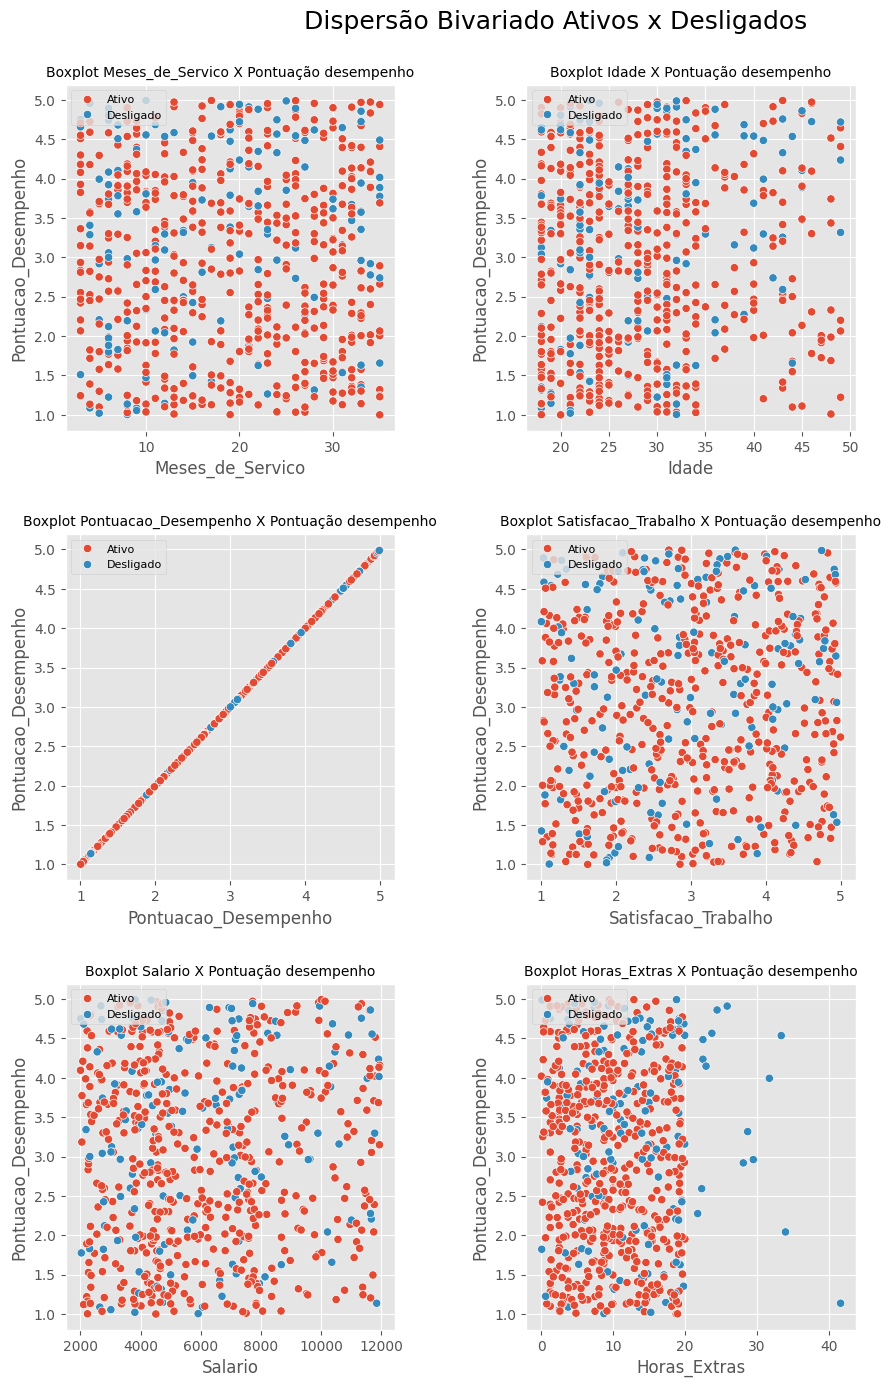

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão Bivariado Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Pontuacao_Desempenho'],hue=data['Status'],ax=ax)
    ax.set_title('Boxplot {} X Pontuação desempenho'.format(col), fontsize=10)
    ax.legend(loc='upper left', fontsize=8)

plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

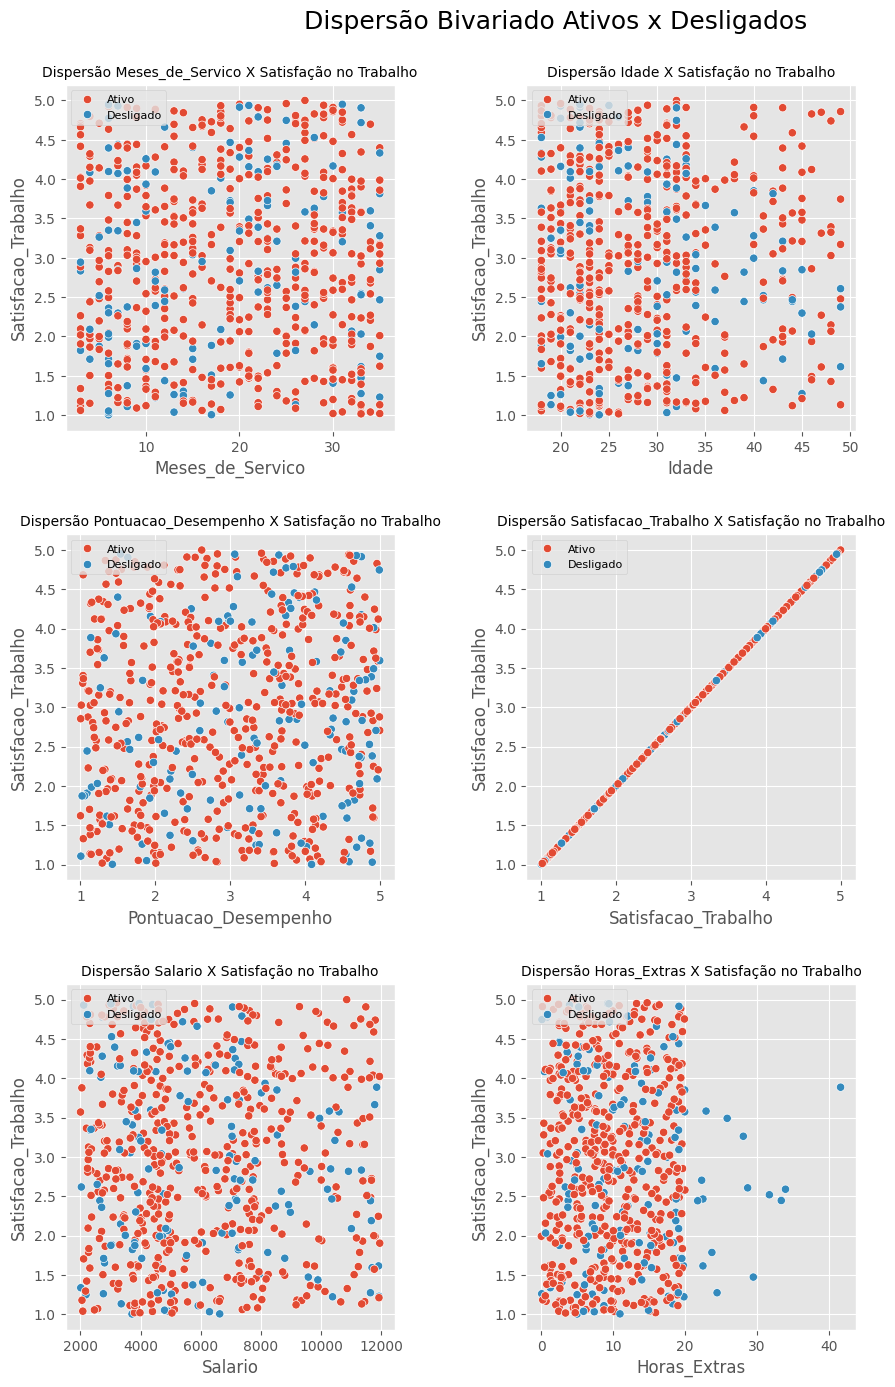

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão Bivariado Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Satisfacao_Trabalho'],hue=data["Status"],ax=ax)
    ax.set_title('Dispersão {} X Satisfação no Trabalho'.format(col),fontsize=10)
    ax.legend(loc='upper left', fontsize=8)

plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

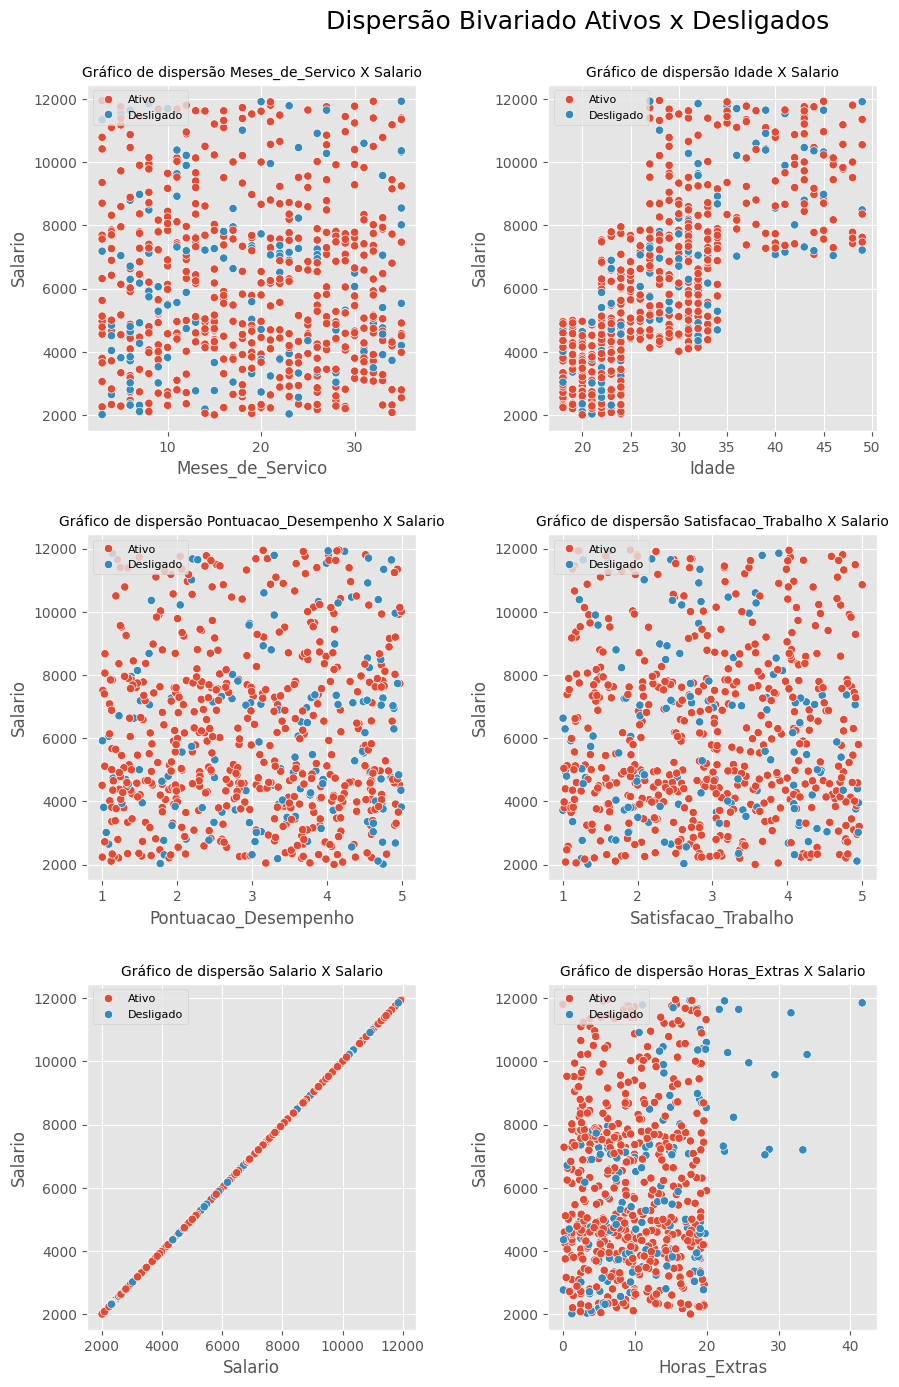

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão Bivariado Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Salario'],hue=data['Status'],ax=ax)
    ax.set_title('Gráfico de dispersão {} X Salario'.format(col), fontsize=10)
    ax.legend(loc='upper left', fontsize=8)

plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

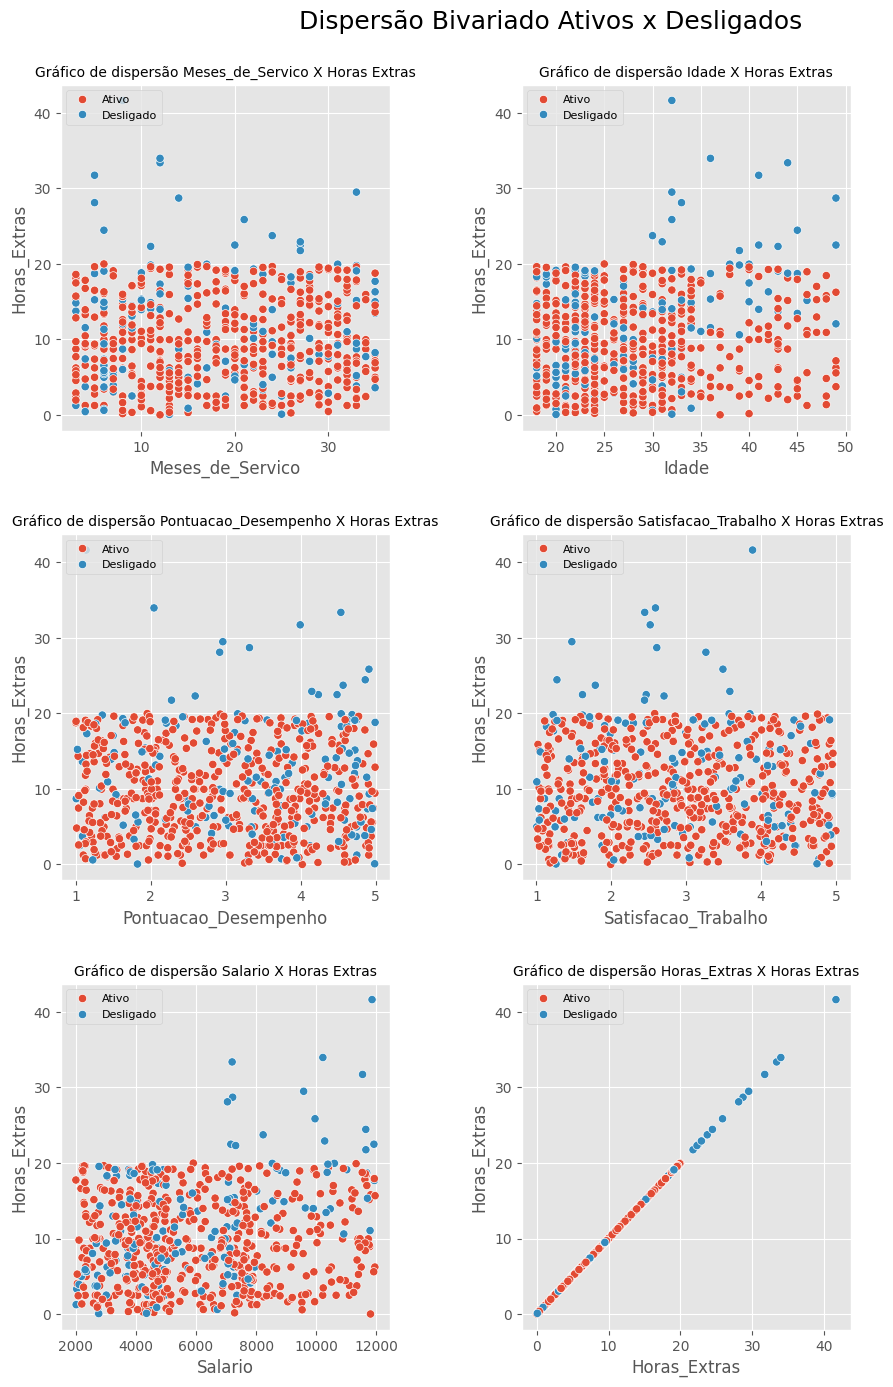

In [ ]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

fig.suptitle('Dispersão Bivariado Ativos x Desligados', fontsize=18)

axes = axes.flatten()

for ax, col in zip(axes, lista):
    sns.scatterplot(x=data[col],y=data['Horas_Extras'],hue=data['Status'],ax=ax)
    ax.set_title('Gráfico de dispersão {} X Horas Extras'.format(col), fontsize=10)
    ax.legend(loc='upper left', fontsize=8)


plt.subplots_adjust(left=0.01, bottom=0.1, right=0.8, top=0.93, wspace=0.4, hspace=0.3)

plt.show()

#Relatório Técnico sobre os dados

In [ ]:
tot_d = pd.DataFrame(data_d['Nivel_Cargo'].value_counts().reset_index())
tot_a = pd.DataFrame(data_a['Nivel_Cargo'].value_counts().reset_index())
tot_a

Nivel_Cargo  count
0       Pleno    180
1      Junior    177
2      Sênior    149

In [ ]:
# Criar um grid de gráficos
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates

horizontal_spacing = 0.05
vertical_spacing = 0.11
legend_horizontal_spacing = -0.005

Figura = make_subplots(
    vertical_spacing=vertical_spacing,
    horizontal_spacing=horizontal_spacing,

    rows=8, cols=4,

    specs=[

      # Linha 1
      [ {'type':'pie', 'colspan': 2, 'rowspan' : 2},None, {'type':'pie', 'colspan': 2, 'rowspan' : 2}, None,],

      # Linha 2
      [ None, None,None, None],

      # Linha 3
      [ { 'colspan': 2, 'rowspan' : 2 }, None, { 'type':'scatter','colspan': 2, 'rowspan' : 2 }, None ],

      # Linha 4
      [ None, None, None, None],

      # Linha 5
      [ { 'colspan': 2, 'rowspan' : 2 }, None,{ 'colspan': 2, 'rowspan' : 2 }, None],

      # Linha 6
      [ None, None,None, None],

      # Linha 7
      [ { 'colspan': 4, 'rowspan' : 2 }, None,None, None],

      # Linha 8
      [ None, None,None, None],

    ],


    subplot_titles=( 'Colaboradores desligados por cargo', 'Colaboradores ativos por cargo',
                    'Satisfacao_Trabalho X Salário', 'Salário X Satisfacao_Trabalho', 'Satisfacao_Trabalho x Nivel_Cargo',
                     'Horas_Extras X Nivel Cargo', 'Pontuacao_Desempenho X Nivel_Cargo')

)

In [ ]:
Azul = 'rgb(49,130,189)'

# Gráfico 1
Grafico_1 = go.Pie(
    labels = tot_d.Nivel_Cargo,
      values = tot_d['count'],
      pull=0.01,
      hole=.4,
      hoverinfo="label+percent+value",
    )

# Gráfico 2
Grafico_2 = go.Pie(
    labels = tot_a.Nivel_Cargo,
      values = tot_a['count'],
      pull=0.01,
      hole=.4,
      hoverinfo="label+percent+value"
    )

# Gráfico 3
Grafico_3 = go.Box(x=data['Faixa_Salario'], y=data['Satisfacao_Trabalho'],name='Boxplot')

#Gráfico 5
Grafico_5 = go.Box(x=data['Nivel_Cargo'], y=data['Satisfacao_Trabalho'],name='Boxplot')


In [ ]:
Ativo = data[data['Status'] == 'Ativo']
desligado = data[data['Status'] == 'Desligado']

Figura.add_trace( Grafico_1, row=1, col=1)
Figura.add_trace( Grafico_2, row=1, col=3)
Figura.add_trace( Grafico_3, row=3, col=1)

#Gráfico 4
Figura.add_trace(go.Scatter(
        x=Ativo['Satisfacao_Trabalho'],
        y=Ativo['Salario'],
        mode='markers',
        name='Ativo',
        marker=dict(color='blue')
    ),
    row=3, col=3)
Figura.add_trace(go.Scatter(
        x=desligado['Satisfacao_Trabalho'],
        y=desligado['Salario'],
        mode='markers',
        name='Desligado',
        marker=dict(color='red')
  ),
    row=3, col=3)

#Gráfico 05
Figura.add_trace(go.Box(
    x=Ativo['Nivel_Cargo'],
    y=Ativo['Satisfacao_Trabalho'],
    name='Ativos',
    marker_color='#3D9970',
),row=5, col=1)

Figura.add_trace(go.Box(
    x=desligado['Nivel_Cargo'],
    y=desligado['Satisfacao_Trabalho'],
    name='Desligados',
    marker_color='#FF4136',
),row=5, col=1)

#Gráfico 06
Figura.add_trace(go.Box(
    x=Ativo['Nivel_Cargo'],
    y=Ativo['Horas_Extras'],
    name='Ativos',
    marker_color='#3D9970',
),row=5, col=3)

Figura.add_trace(go.Box(
    x=desligado['Nivel_Cargo'],
    y=desligado['Horas_Extras'],
    name='Desligados',
    marker_color='#FF4136',
),row=5, col=3)


#Gráfico 07
Figura.add_trace(go.Box(
    x=Ativo['Nivel_Cargo'],
    y=Ativo['Pontuacao_Desempenho'],
    name='Ativos',
    marker_color='#3D9970',
),row=7, col=1)

Figura.add_trace(go.Box(
    x=desligado['Nivel_Cargo'],
    y=desligado['Pontuacao_Desempenho'],
    name='Desligados',
    marker_color='#FF4136',
),row=7, col=1)


Figura.update_layout(
    width=900, height=1000,
    template=   'seaborn',
    paper_bgcolor='aliceblue',
    title={'text':'Relatório Técnico Analítico Desafio de Dados de RH DataViking','y': 0.97,
    'x': 0.5 }
  )


#Conclusão

Vamos concluir respondendo as questões pontuadas inicialmente.

**1 - Existe algum cargo com maior rotatividade?**

Não foram encontrados indícios nos dados de uma maior rotatividade em algum cargo específico, tendo em vista que as porcentagens de funcionários ativos e desligados são quase equivalentes.

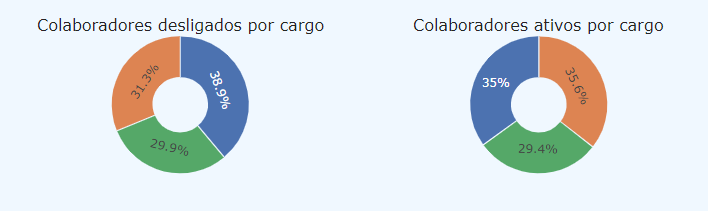


**2 - Os menores salários estão satisfeitos com a empresa?**

Os dados não forneceram evidências claras; a satisfação está equilibrada em todas as faixas salariais. Além disso, os dados estão muito dispersos, sem ser possível encontrar um padrão.

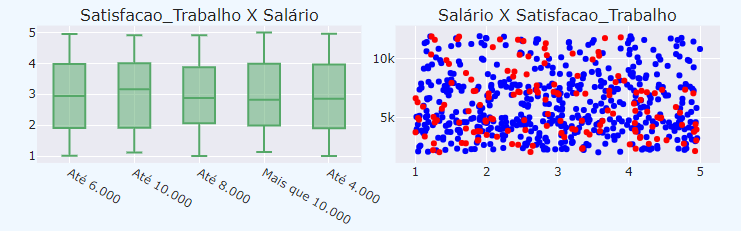

**3 - Há algum cargo com baixa satisfação?**

Identificamos que os funcionários que ocupavam cargos sêniores e que já foram desligados manifestavam insatisfação com a empresa, sugerindo que essa insatisfação possa ter contribuído para a decisão de deixarem a empresa.

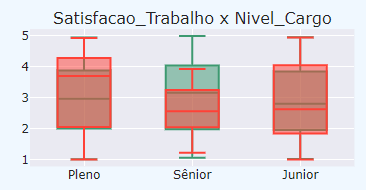

**4 - Horas extras podem estar causando a rotatividade?**

Essa questão é de suma importância, pois destaca um ponto crítico que pode estar contribuindo para a rotatividade em um determinado cargo, podendo ser complementada pela 3ª questão. Observamos que os funcionários desligados, especialmente aqueles em cargos sêniores e com histórico de insatisfação, frequentemente realizavam horas extras, o que demanda atenção especial.

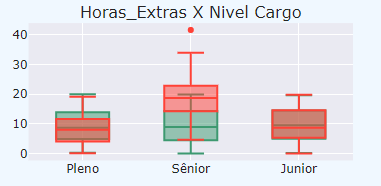

**5 - Qual desempenho geral dos funcionários que foram desligados?**

Essa questão é crucial para a empresa, pois observamos que os funcionários que foram desligados demonstraram um desempenho superior aos que permanecem ativos. Portanto, é essencial prestar atenção aos colaboradores de alto desempenho, mesmo que nem todos os cargos tenham demonstrado insatisfação com a empresa. Esta informação é valiosa, pois sugere que a empresa pode proporcionar melhores oportunidades para esses funcionários, reduzindo o risco de perder-los para a concorrência.

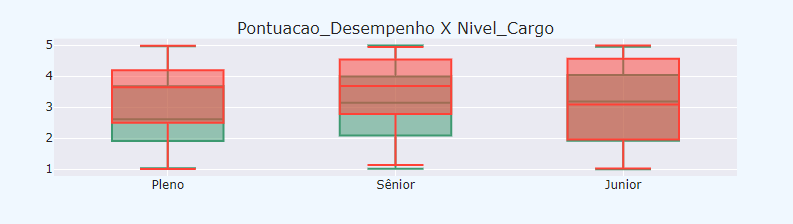


Os gráficos fornecidos foram devidamente organizados e incluídos no relatório Técnico anterior para responder às questões levantadas.


